In [1]:
#!pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#we try to find the difference in score home_team_score - away_team_score
complete_matchDf = pd.read_pickle('complete_match.pkl')
complete_matchDf.drop(['match_id', 'home_team_id', 'away_team_id', 'date'], axis=1)

home_team_goal  away_team_goal  home_team_build_up_play_speed  \
0                   3               2                             50   
1                   2               3                             40   
2                   1               0                             65   
3                   2               1                             35   
4                   0               4                             53   
...               ...             ...                            ...   
18238               3               3                             62   
18239               1               0                             52   
18240               1               2                             53   
18241               2               0                             50   
18242               4               3                             52   

       home_team_build_up_play_dribbling  home_team_build_up_play_passing  \
0                              48.607362                               35   
1                              48.607362                               50   
2                              48.607362                               60   
3                              48.607362                               40   
4                              48.607362                               40   
...                                  ...                              ...   
18238                          49.000000                               46   
18239                          46.000000                               48   
18240                          32.000000                               56   
18241                          60.000000                               54   
18242                          56.000000                               64   

       home_team_chance_creationg_passing  home_team_chance_creation_crossing  \
0                                      70                                  50   
1                                      45                                  43   
2                                      50                                  40   
3                                      45                                  50   
4                                      55                                  55   
...                                   ...                                 ...   
18238                                  47                                  50   
18239                                  39                                  39   
18240                                  38                                  53   
18241                                  52                                  54   
18242                                  39                                  66   

       home_team_chance_creation_shooting  home_team_defence_pressure  \
0                                      60                          70   
1                                      60                          70   
2                                      50                          60   
3                                      45                          60   
4                                      65                          70   
...                                   ...                         ...   
18238                                  54                          47   
18239                                  37                          40   
18240                                  46                          42   
18241                                  46                          36   
18242                                  46                          44   

       home_team_defence_aggression  home_team_defence_team_width  \
0                                50                            70   
1                                70                            70   
2                                70                            60   
3                                70                            70   
4                     

In [3]:
#note we add 1 to both to avoid division by 0
complete_matchDf['home_team_goal_to_away_team_goal_ratio'] = (complete_matchDf['home_team_goal']+ 1)/(complete_matchDf['away_team_goal'] + 1)

In [19]:
complete_matchDf

match_id  home_team_id  away_team_id                        date  \
0        665626          8635          8342  2010-02-03 00:00:00.000000   
1        665630          9986          9985  2010-02-04 00:00:00.000000   
2        665634          8203          9993  2010-02-02 00:00:00.000000   
3        665665          8342         10001  2010-01-30 00:00:00.000000   
4        665666          9985          8635  2010-01-17 00:00:00.000000   
...         ...           ...           ...                         ...   
18238   1992089         10243         10191  2015-09-13 00:00:00.000000   
18239   1992091         10190         10191  2015-09-22 00:00:00.000000   
18240   1992092          9824         10199  2015-09-23 00:00:00.000000   
18241   1992093          9956         10179  2015-09-23 00:00:00.000000   
18242   1992095         10192          9931  2015-09-23 00:00:00.000000   

       home_team_goal  away_team_goal  home_team_build_up_play_speed  \
0                   3               2                             50   
1                   2               3                             40   
2                   1               0                             65   
3                   2               1                             35   
4                   0               4                             53   
...               ...             ...                            ...   
18238               3               3                             62   
18239               1               0                             52   
18240               1               2                             53   
18241               2               0                             50   
18242               4               3                             52   

       home_team_build_up_play_dribbling  home_team_build_up_play_passing  \
0                              48.607362                               35   
1                              48.607362                               50   
2                              48.607362                               60   
3                              48.607362                               40   
4                              48.607362                               40   
...                                  ...                              ...   
18238                          49.000000                               46   
18239                          46.000000                               48   
18240                          32.000000                               56   
18241                          60.000000                               54   
18242                          56.000000                               64   

       home_team_chance_creationg_passing  ...  \
0                                      70  ...   
1                                      45  ...   
2                                      50  ...   
3                                      45  ...   
4                                      55  ...   
...                                   ...  ...   
18238                                  47  ...   
18239                                  39  ...   
18240                                  38  ...   
18241                                  52  ...   
18242                                  39  ...   

       home_team_defence_aggression_to_away_team_defence_team_width_ratio  \
0                                               0.718310                    
1                                               1.075758                    
2                                               1.000000                    
3                                               1.000000                    
4                                               1.000000                    
...                                                  ...                    
18238                                           0.814815                    
18239                                           0.685185                    
18240                 

In [20]:
complete_matchDf['home_team_goal_to_away_team_goal_ratio']

0        1.333333
1        0.750000
2        2.000000
3        1.500000
4        0.200000
           ...   
18238    1.000000
18239    2.000000
18240    0.666667
18241    3.000000
18242    1.250000
Name: home_team_goal_to_away_team_goal_ratio, Length: 18243, dtype: float64

In [21]:
max(complete_matchDf['home_team_goal_to_away_team_goal_ratio'])

11.0

In [5]:
home_win = len(complete_matchDf[complete_matchDf['home_team_goal_to_away_team_goal_ratio'] > 1])
home_tie = len(complete_matchDf[complete_matchDf['home_team_goal_to_away_team_goal_ratio'] == 1])
home_loss = len(complete_matchDf[complete_matchDf['home_team_goal_to_away_team_goal_ratio'] < 1])
total = complete_matchDf['home_team_goal_to_away_team_goal_ratio'].count()
print(home_win, home_tie, home_loss, total)

8381 4628 5234 18243


<BarContainer object of 3 artists>

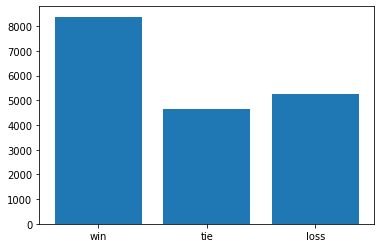

In [6]:
results = ['win', 'tie', 'loss']
results_count = [home_win, home_tie, home_loss]
plt.bar(results, results_count)

In [7]:
#hypothesis testing time:
#https://www.math.uwaterloo.ca/~pkates/LT3/jsdemos/contest/s231_new_v3.pdf
#we assume probability of win = probability of loss: 
#so probability should be: alpha, 1 - 2alpha, alpha
#L(alpha) = alpha^{8381}*(1 - 2alpha)^{4628}*alpha^{5234}
# = alpha^{13705}*(1-2alpha)^{4628}
#d/d(alpha) L(alpha) = 13705*alpha^{13704}*(1-2alpha)^{4628} - 2*4628*alpha^{13705}*(1-2alpha)^{4627} = 0
#assuming alpha =/= 1, 1/2:
#13705*(1 - 2alpha) - 9256alpha = 0
#13507 = 36666alpha
#alpha = 13507/36666

In [8]:
#With R Test: 
#p-value: 1.56726e-163
#we can be VERY confident that probability of win =/= probability of loss

In [9]:
home_features_of_interest = [
    'home_team_build_up_play_speed',
    'home_team_build_up_play_dribbling',
    'home_team_build_up_play_passing',
    'home_team_chance_creationg_passing',
    'home_team_chance_creation_crossing',
    'home_team_chance_creation_shooting',
    'home_team_defence_pressure',
    'home_team_defence_aggression',
    'home_team_defence_team_width',
]

away_features_of_interest = [
    'away_team_build_up_play_speed',
    'away_team_build_up_play_dribbling',
    'away_team_build_up_play_passing',
    'away_team_chance_creationg_passing',
    'away_team_chance_creation_crossing',
    'away_team_chance_creation_shooting',
    'away_team_defence_pressure',
    'away_team_defence_aggression',
    'away_team_defence_team_width',
]

ratio_features_of_interest = []

for home_ratio in home_features_of_interest:
    for away_ratio in away_features_of_interest:
        ratio_name = home_ratio + "_to_" + away_ratio + "_ratio"
    #we add 1 to denominator and denominator to avoid division by 0
        complete_matchDf[ratio_name] = (complete_matchDf[home_ratio] + 1)/ (complete_matchDf[away_ratio] + 1)
        ratio_features_of_interest.append(ratio_name)

In [10]:
complete_matchDf

match_id  home_team_id  away_team_id                        date  \
0        665626          8635          8342  2010-02-03 00:00:00.000000   
1        665630          9986          9985  2010-02-04 00:00:00.000000   
2        665634          8203          9993  2010-02-02 00:00:00.000000   
3        665665          8342         10001  2010-01-30 00:00:00.000000   
4        665666          9985          8635  2010-01-17 00:00:00.000000   
...         ...           ...           ...                         ...   
18238   1992089         10243         10191  2015-09-13 00:00:00.000000   
18239   1992091         10190         10191  2015-09-22 00:00:00.000000   
18240   1992092          9824         10199  2015-09-23 00:00:00.000000   
18241   1992093          9956         10179  2015-09-23 00:00:00.000000   
18242   1992095         10192          9931  2015-09-23 00:00:00.000000   

       home_team_goal  away_team_goal  home_team_build_up_play_speed  \
0                   3               2                             50   
1                   2               3                             40   
2                   1               0                             65   
3                   2               1                             35   
4                   0               4                             53   
...               ...             ...                            ...   
18238               3               3                             62   
18239               1               0                             52   
18240               1               2                             53   
18241               2               0                             50   
18242               4               3                             52   

       home_team_build_up_play_dribbling  home_team_build_up_play_passing  \
0                              48.607362                               35   
1                              48.607362                               50   
2                              48.607362                               60   
3                              48.607362                               40   
4                              48.607362                               40   
...                                  ...                              ...   
18238                          49.000000                               46   
18239                          46.000000                               48   
18240                          32.000000                               56   
18241                          60.000000                               54   
18242                          56.000000                               64   

       home_team_chance_creationg_passing  ...  \
0                                      70  ...   
1                                      45  ...   
2                                      50  ...   
3                                      45  ...   
4                                      55  ...   
...                                   ...  ...   
18238                                  47  ...   
18239                                  39  ...   
18240                                  38  ...   
18241                                  52  ...   
18242                                  39  ...   

       home_team_defence_aggression_to_away_team_defence_team_width_ratio  \
0                                               0.718310                    
1                                               1.075758                    
2                                               1.000000                    
3                                               1.000000                    
4                                               1.000000                    
...                                                  ...                    
18238                                           0.814815                    
18239                                           0.685185                    
18240                 

home_team_build_up_play_speed_to_away_team_build_up_play_speed_ratio
home_team_build_up_play_speed_to_away_team_build_up_play_dribbling_ratio
home_team_build_up_play_speed_to_away_team_build_up_play_passing_ratio
home_team_build_up_play_speed_to_away_team_chance_creationg_passing_ratio
home_team_build_up_play_speed_to_away_team_chance_creation_crossing_ratio
home_team_build_up_play_speed_to_away_team_chance_creation_shooting_ratio
home_team_build_up_play_speed_to_away_team_defence_pressure_ratio
home_team_build_up_play_speed_to_away_team_defence_aggression_ratio
home_team_build_up_play_speed_to_away_team_defence_team_width_ratio
home_team_build_up_play_dribbling_to_away_team_build_up_play_speed_ratio
home_team_build_up_play_dribbling_to_away_team_build_up_play_dribbling_ratio
home_team_build_up_play_dribbling_to_away_team_build_up_play_passing_ratio
home_team_build_up_play_dribbling_to_away_team_chance_creationg_passing_ratio
home_team_build_up_play_dribbling_to_away_team_chance_creati

C:\Users\hhong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


home_team_build_up_play_passing_to_away_team_chance_creation_crossing_ratio
home_team_build_up_play_passing_to_away_team_chance_creation_shooting_ratio
home_team_build_up_play_passing_to_away_team_defence_pressure_ratio
home_team_build_up_play_passing_to_away_team_defence_aggression_ratio
home_team_build_up_play_passing_to_away_team_defence_team_width_ratio
home_team_chance_creationg_passing_to_away_team_build_up_play_speed_ratio
home_team_chance_creationg_passing_to_away_team_build_up_play_dribbling_ratio
home_team_chance_creationg_passing_to_away_team_build_up_play_passing_ratio
home_team_chance_creationg_passing_to_away_team_chance_creationg_passing_ratio
home_team_chance_creationg_passing_to_away_team_chance_creation_crossing_ratio
home_team_chance_creationg_passing_to_away_team_chance_creation_shooting_ratio
home_team_chance_creationg_passing_to_away_team_defence_pressure_ratio
home_team_chance_creationg_passing_to_away_team_defence_aggression_ratio
home_team_chance_creationg_pass

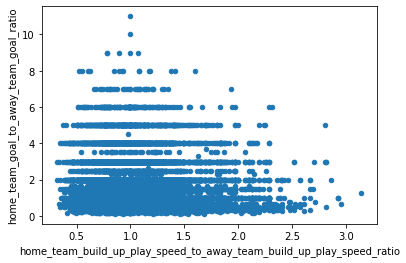

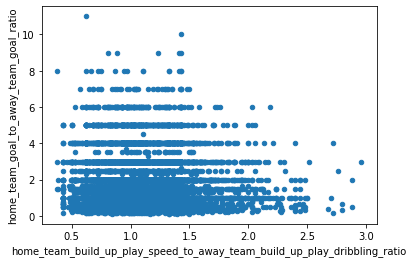

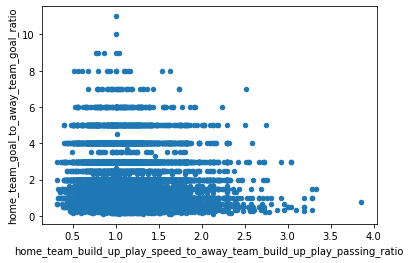

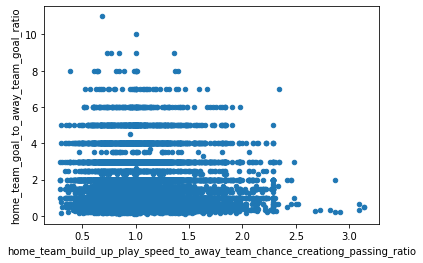

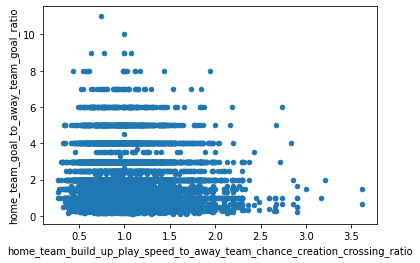

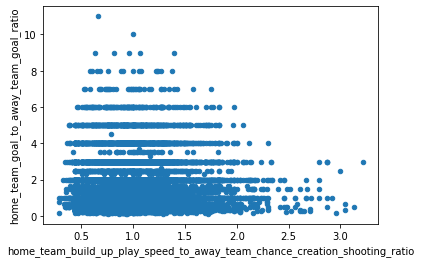

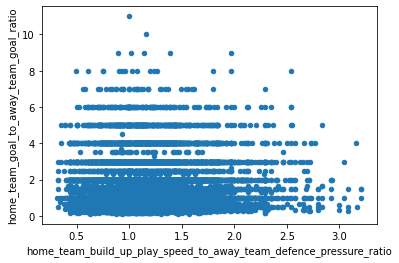

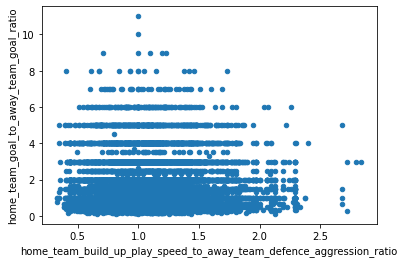

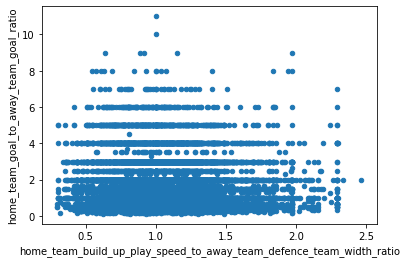

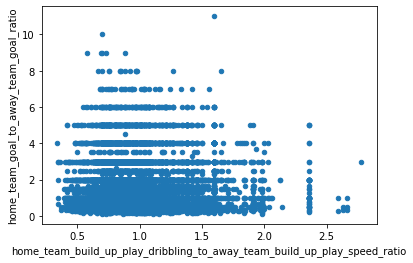

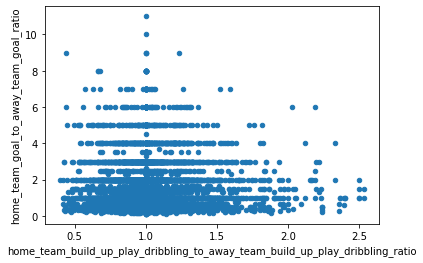

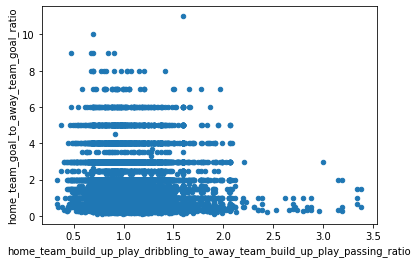

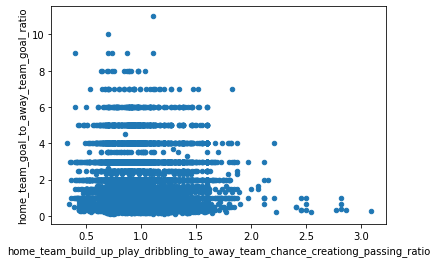

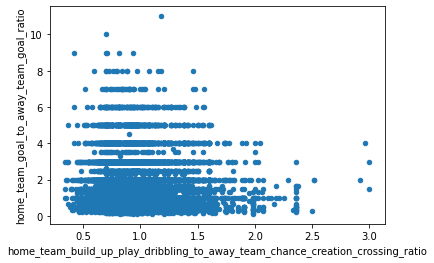

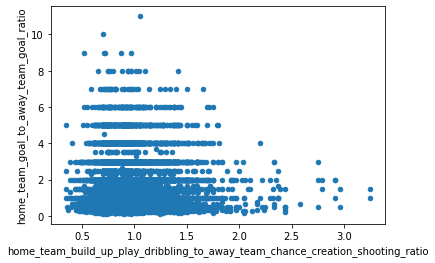

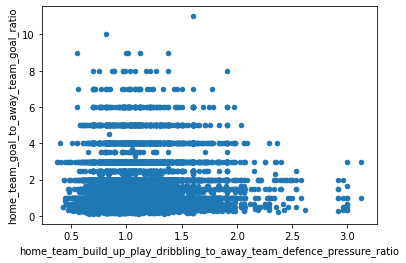

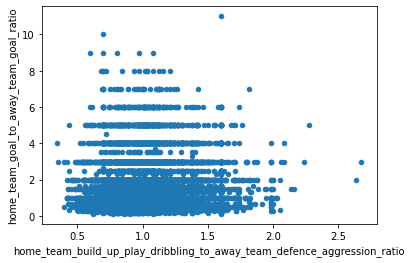

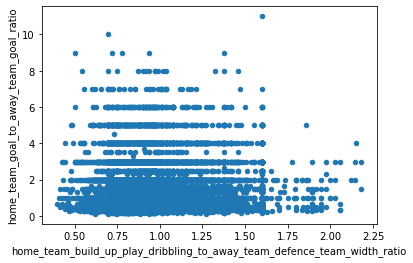

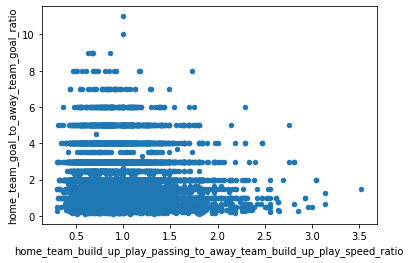

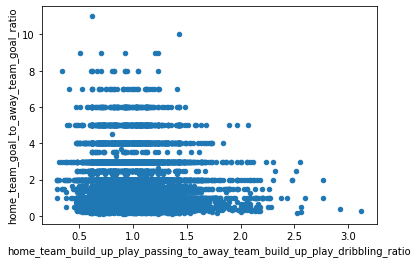

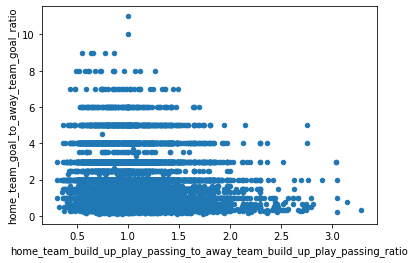

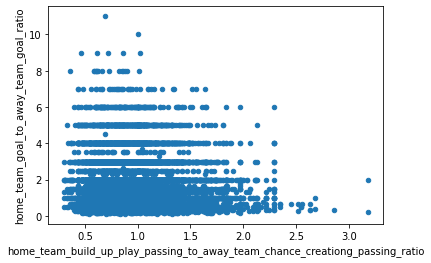

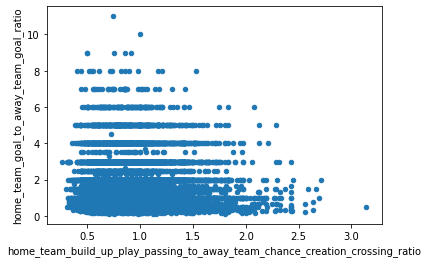

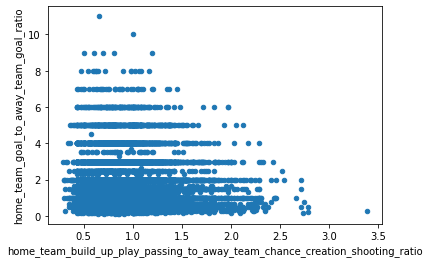

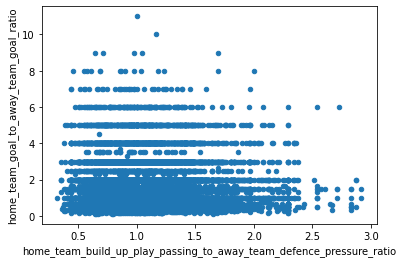

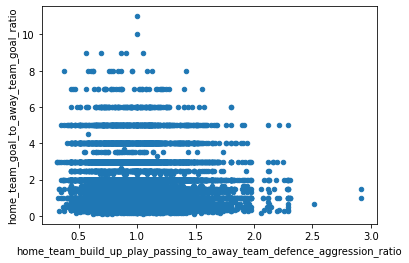

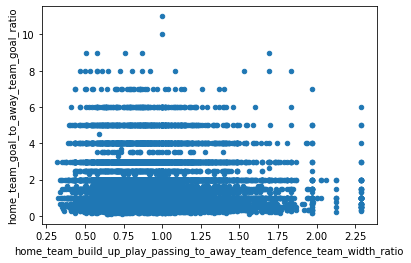

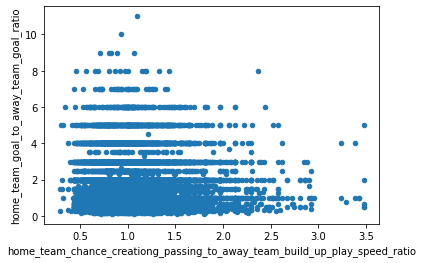

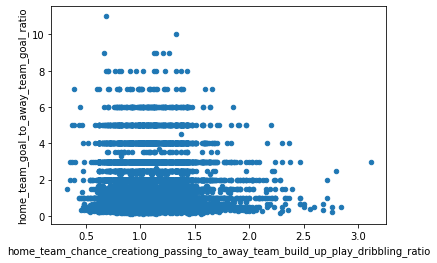

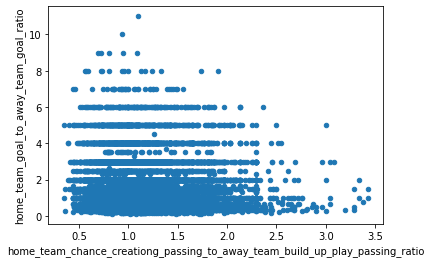

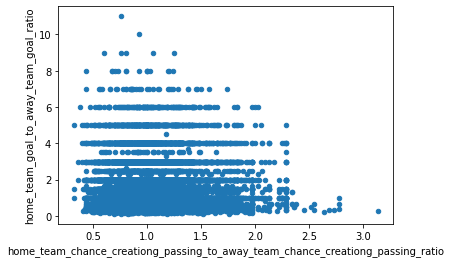

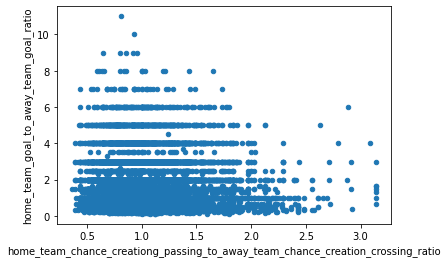

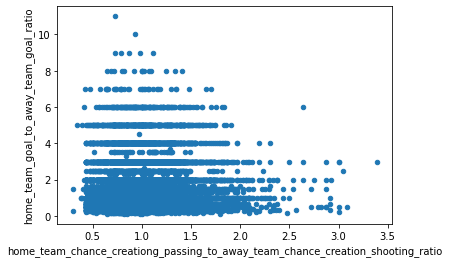

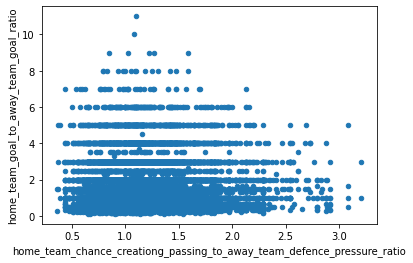

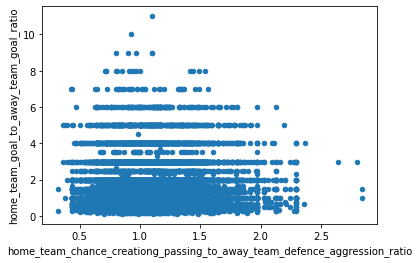

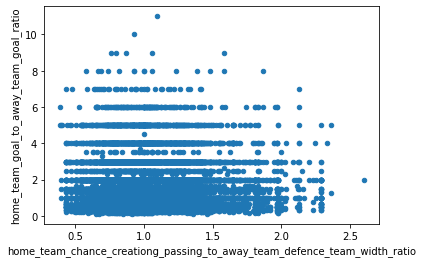

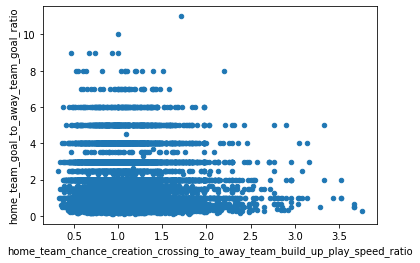

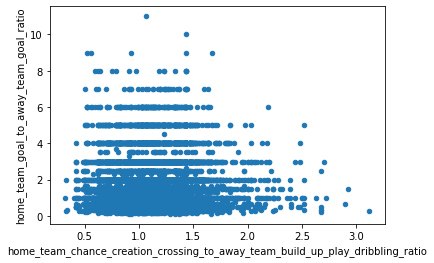

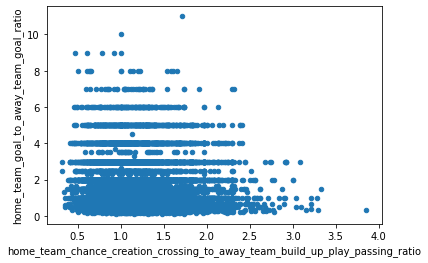

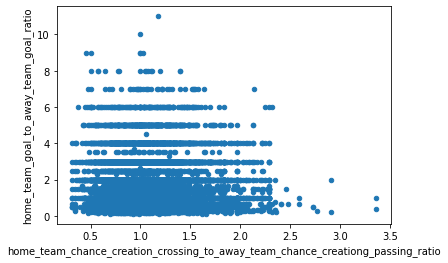

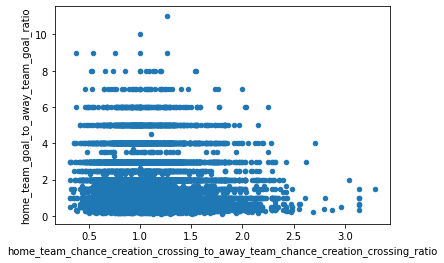

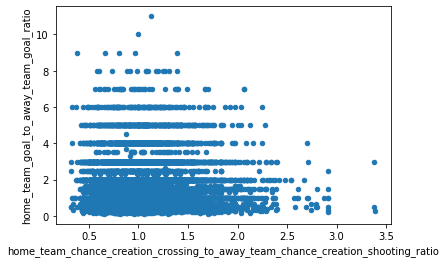

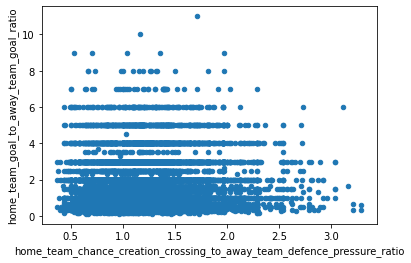

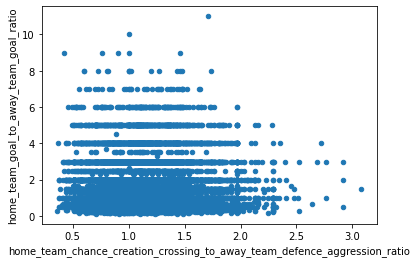

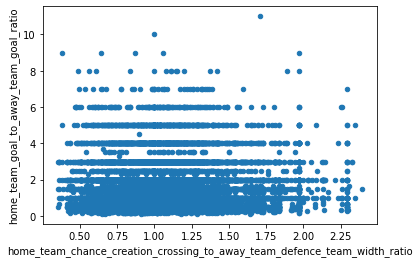

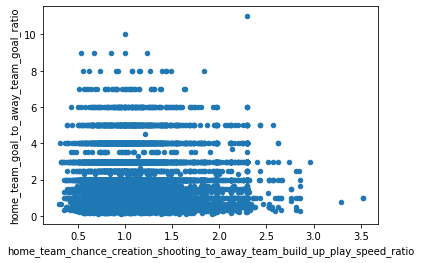

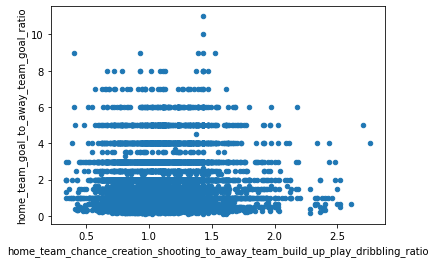

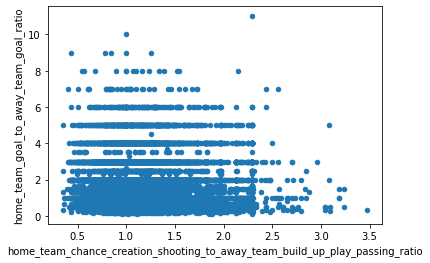

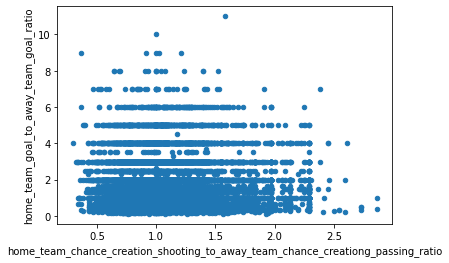

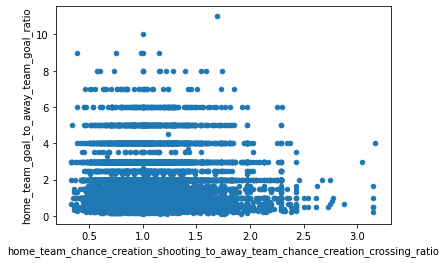

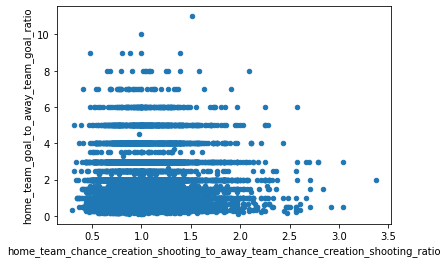

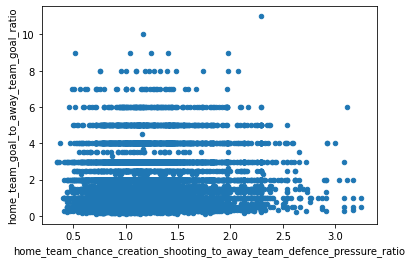

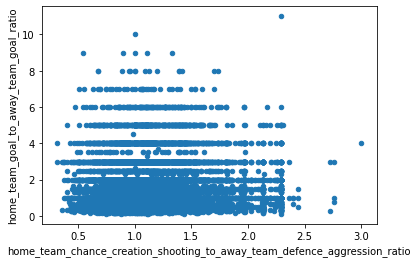

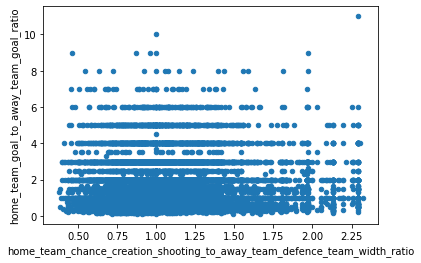

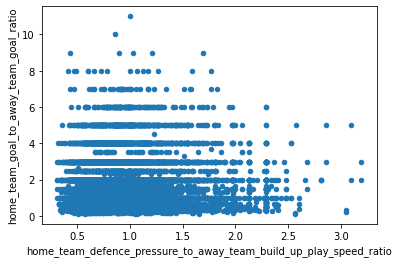

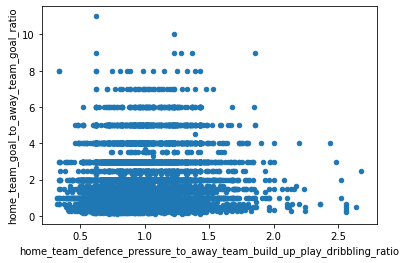

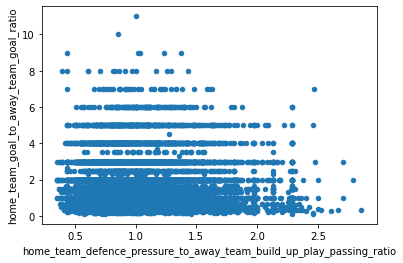

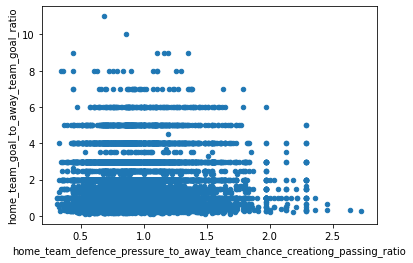

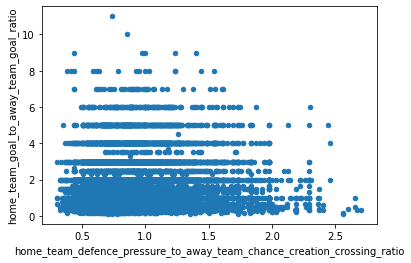

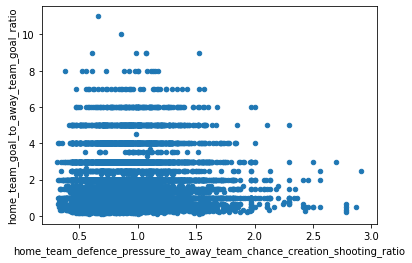

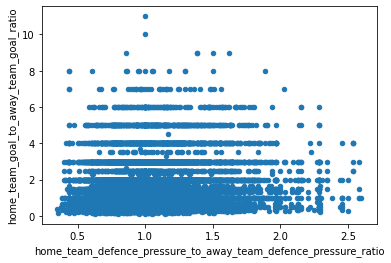

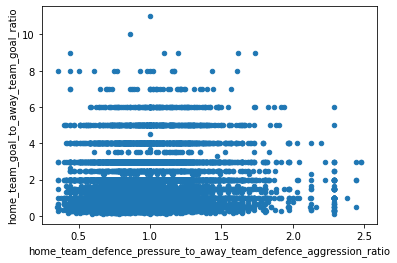

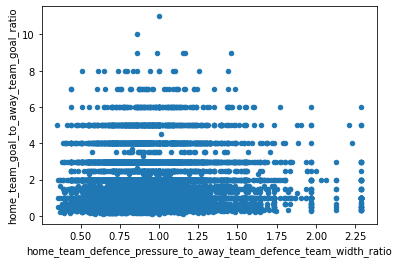

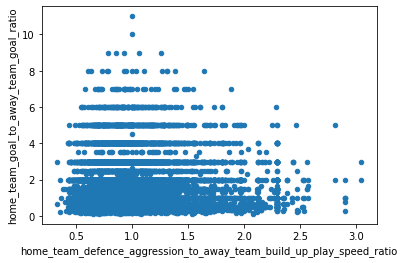

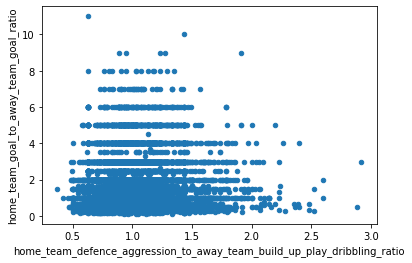

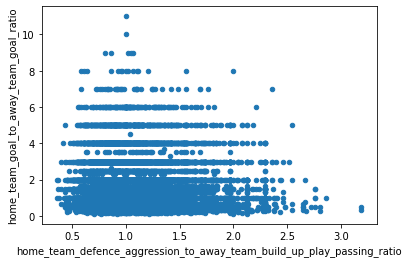

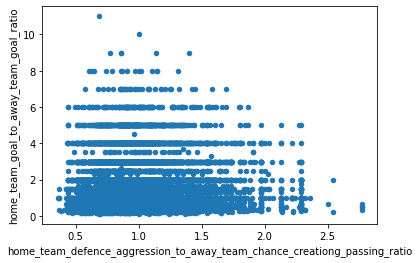

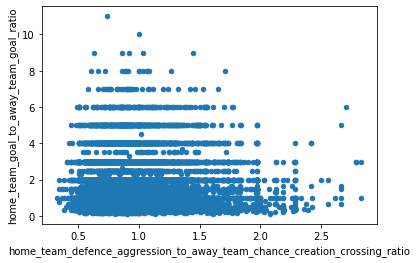

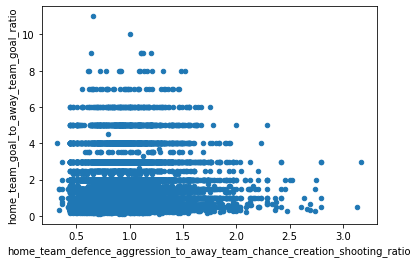

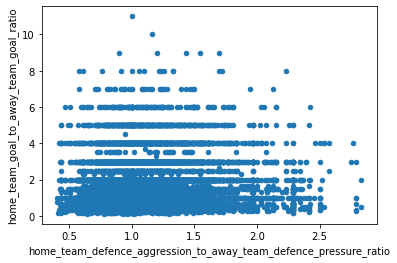

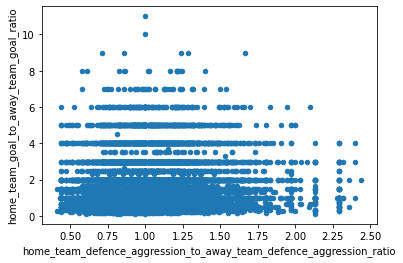

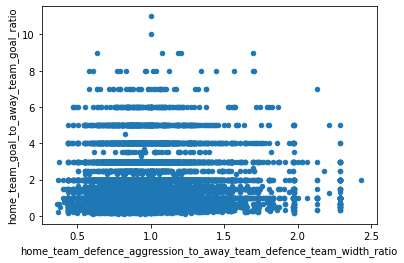

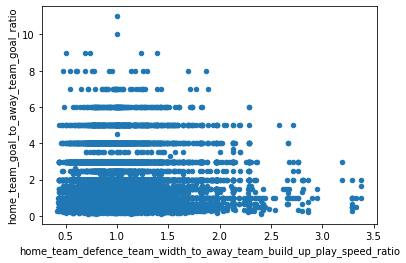

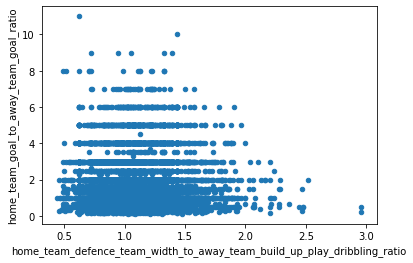

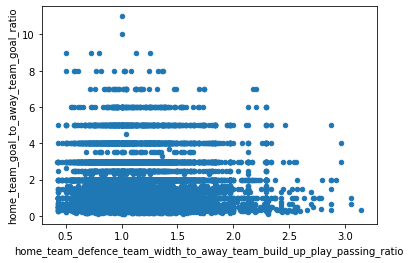

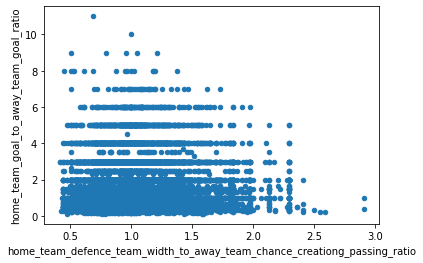

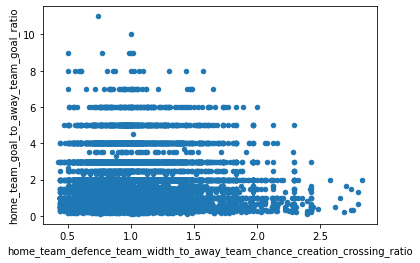

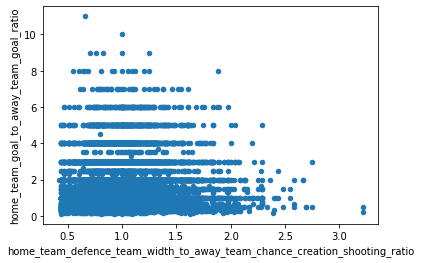

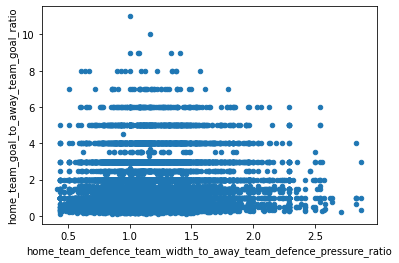

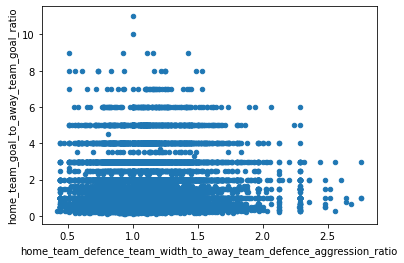

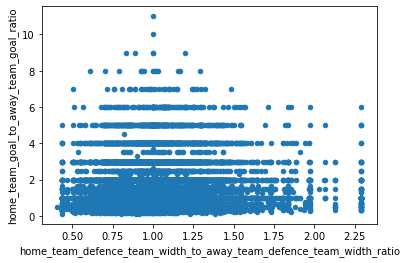

In [11]:
for ratio in ratio_features_of_interest:
    complete_matchDf.plot.scatter(x=ratio,
                      y='home_team_goal_to_away_team_goal_ratio')

In [12]:
for ratio in ratio_features_of_interest:
    print(ratio)
    print(complete_matchDf[ratio].corr(complete_matchDf['home_team_goal_to_away_team_goal_ratio'], method= 'pearson'))

home_team_build_up_play_speed_to_away_team_build_up_play_speed_ratio
-0.012474807756975652
home_team_build_up_play_speed_to_away_team_build_up_play_dribbling_ratio
-0.010168188290495565
home_team_build_up_play_speed_to_away_team_build_up_play_passing_ratio
-0.055333369898371794
home_team_build_up_play_speed_to_away_team_chance_creationg_passing_ratio
-0.008130062048366015
home_team_build_up_play_speed_to_away_team_chance_creation_crossing_ratio
-0.004893627559604234
home_team_build_up_play_speed_to_away_team_chance_creation_shooting_ratio
-0.002301264429304282
home_team_build_up_play_speed_to_away_team_defence_pressure_ratio
0.03273517602200725
home_team_build_up_play_speed_to_away_team_defence_aggression_ratio
0.00968242333189753
home_team_build_up_play_speed_to_away_team_defence_team_width_ratio
-0.0027114659260832523
home_team_build_up_play_dribbling_to_away_team_build_up_play_speed_ratio
-0.000821606570545192
home_team_build_up_play_dribbling_to_away_team_build_up_play_dribbling_ra

In [13]:
for ratio in ratio_features_of_interest:
    print(ratio)
    print(complete_matchDf[ratio].corr(complete_matchDf['home_team_goal_to_away_team_goal_ratio'], method= 'kendall'))

home_team_build_up_play_speed_to_away_team_build_up_play_speed_ratio
-0.0022181050139826225
home_team_build_up_play_speed_to_away_team_build_up_play_dribbling_ratio
-0.0002449188909122661
home_team_build_up_play_speed_to_away_team_build_up_play_passing_ratio
-0.036285494336215
home_team_build_up_play_speed_to_away_team_chance_creationg_passing_ratio
0.003775040611192841
home_team_build_up_play_speed_to_away_team_chance_creation_crossing_ratio
0.006650132892036026
home_team_build_up_play_speed_to_away_team_chance_creation_shooting_ratio
0.009470631551656653
home_team_build_up_play_speed_to_away_team_defence_pressure_ratio
0.033751903961703085
home_team_build_up_play_speed_to_away_team_defence_aggression_ratio
0.01444965333116804
home_team_build_up_play_speed_to_away_team_defence_team_width_ratio
0.008697603232141256
home_team_build_up_play_dribbling_to_away_team_build_up_play_speed_ratio
0.005901707747165234
home_team_build_up_play_dribbling_to_away_team_build_up_play_dribbling_ratio
0.

In [14]:
for ratio in ratio_features_of_interest:
    print(ratio)
    print(complete_matchDf[ratio].corr(complete_matchDf['home_team_goal_to_away_team_goal_ratio'], method= 'spearman'))

home_team_build_up_play_speed_to_away_team_build_up_play_speed_ratio
-0.003172723533198608
home_team_build_up_play_speed_to_away_team_build_up_play_dribbling_ratio
-0.00046510870430208886
home_team_build_up_play_speed_to_away_team_build_up_play_passing_ratio
-0.051362018844513115
home_team_build_up_play_speed_to_away_team_chance_creationg_passing_ratio
0.0053615556976448694
home_team_build_up_play_speed_to_away_team_chance_creation_crossing_ratio
0.009375205423677126
home_team_build_up_play_speed_to_away_team_chance_creation_shooting_ratio
0.01333448388239732
home_team_build_up_play_speed_to_away_team_defence_pressure_ratio
0.047633388958857055
home_team_build_up_play_speed_to_away_team_defence_aggression_ratio
0.02034996112009541
home_team_build_up_play_speed_to_away_team_defence_team_width_ratio
0.012178171815765526
home_team_build_up_play_dribbling_to_away_team_build_up_play_speed_ratio
0.008294085335064856
home_team_build_up_play_dribbling_to_away_team_build_up_play_dribbling_ratio

home_team_build_up_play_speed_to_away_team_build_up_play_speed_ratio
home_team_build_up_play_speed_to_away_team_build_up_play_dribbling_ratio
home_team_build_up_play_speed_to_away_team_build_up_play_passing_ratio
home_team_build_up_play_speed_to_away_team_chance_creationg_passing_ratio
home_team_build_up_play_speed_to_away_team_chance_creation_crossing_ratio
home_team_build_up_play_speed_to_away_team_chance_creation_shooting_ratio
home_team_build_up_play_speed_to_away_team_defence_pressure_ratio
home_team_build_up_play_speed_to_away_team_defence_aggression_ratio
home_team_build_up_play_speed_to_away_team_defence_team_width_ratio
home_team_build_up_play_dribbling_to_away_team_build_up_play_speed_ratio
home_team_build_up_play_dribbling_to_away_team_build_up_play_dribbling_ratio
home_team_build_up_play_dribbling_to_away_team_build_up_play_passing_ratio
home_team_build_up_play_dribbling_to_away_team_chance_creationg_passing_ratio
home_team_build_up_play_dribbling_to_away_team_chance_creati

<ipython-input-56-c1b5b43e8f13>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


home_team_build_up_play_passing_to_away_team_chance_creationg_passing_ratio
home_team_build_up_play_passing_to_away_team_chance_creation_crossing_ratio
home_team_build_up_play_passing_to_away_team_chance_creation_shooting_ratio
home_team_build_up_play_passing_to_away_team_defence_pressure_ratio
home_team_build_up_play_passing_to_away_team_defence_aggression_ratio
home_team_build_up_play_passing_to_away_team_defence_team_width_ratio
home_team_chance_creationg_passing_to_away_team_build_up_play_speed_ratio
home_team_chance_creationg_passing_to_away_team_build_up_play_dribbling_ratio
home_team_chance_creationg_passing_to_away_team_build_up_play_passing_ratio
home_team_chance_creationg_passing_to_away_team_chance_creationg_passing_ratio
home_team_chance_creationg_passing_to_away_team_chance_creation_crossing_ratio
home_team_chance_creationg_passing_to_away_team_chance_creation_shooting_ratio
home_team_chance_creationg_passing_to_away_team_defence_pressure_ratio
home_team_chance_creationg_p

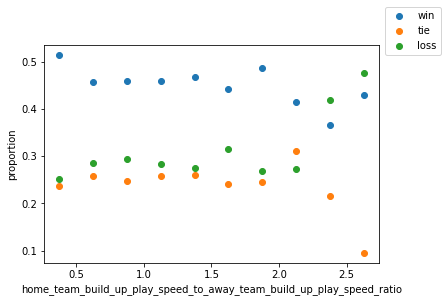

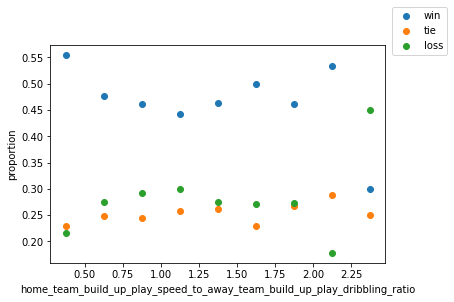

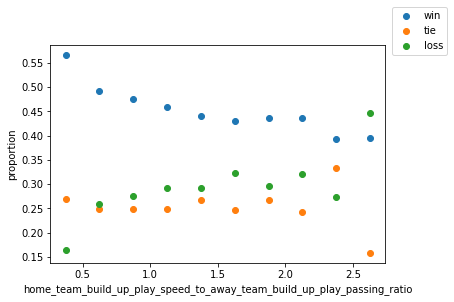

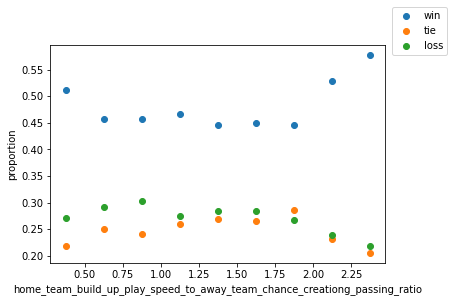

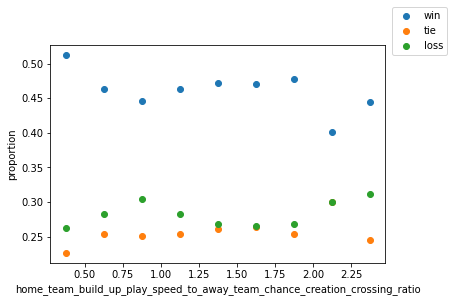

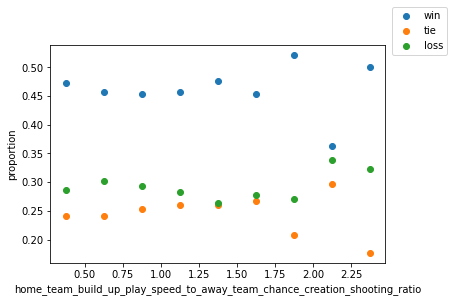

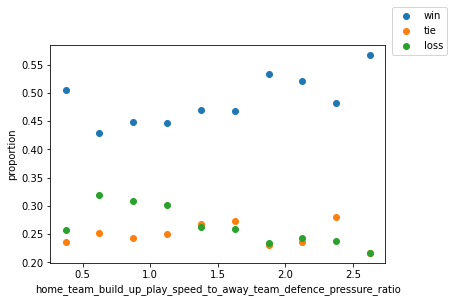

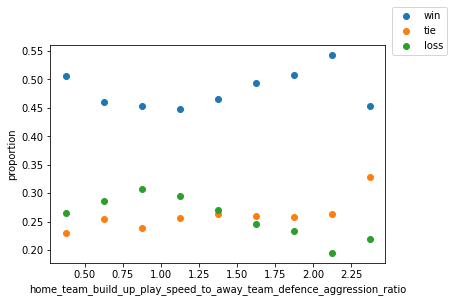

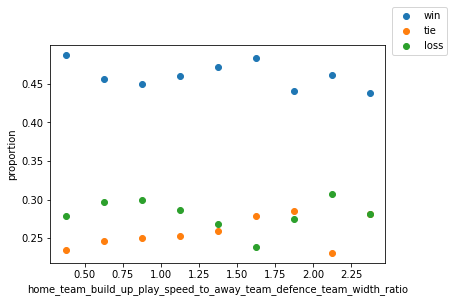

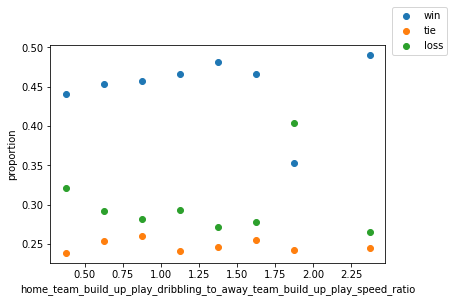

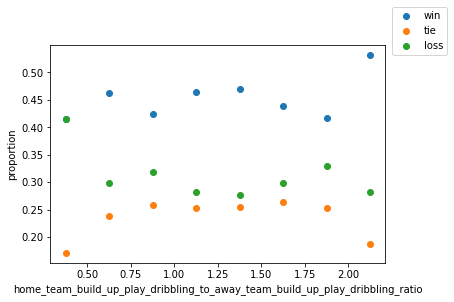

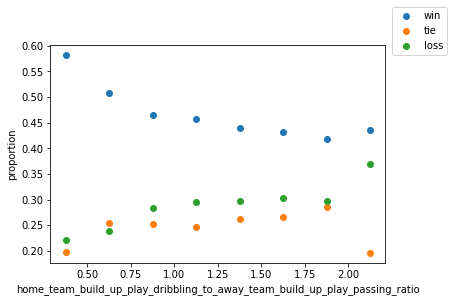

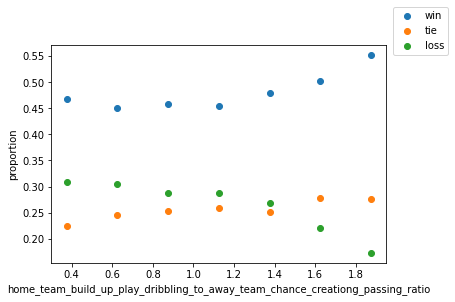

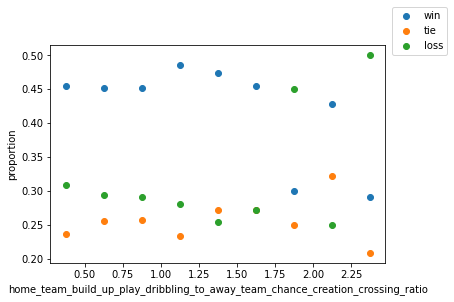

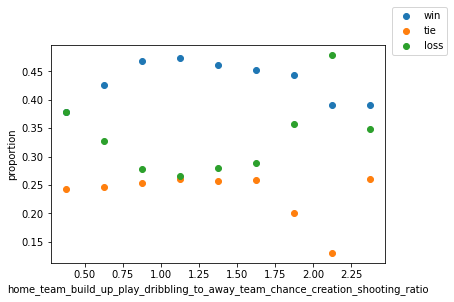

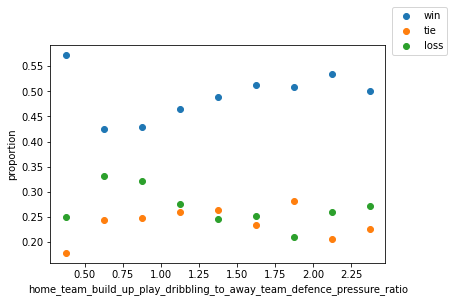

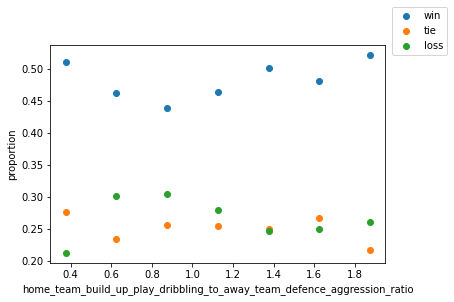

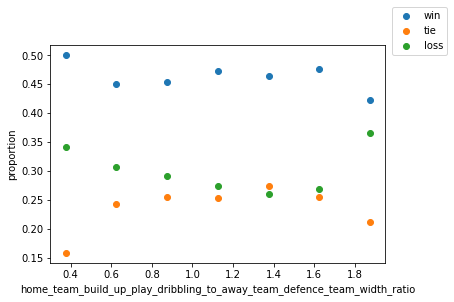

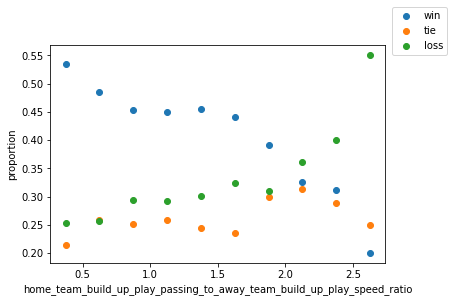

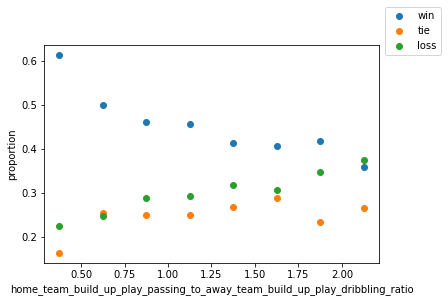

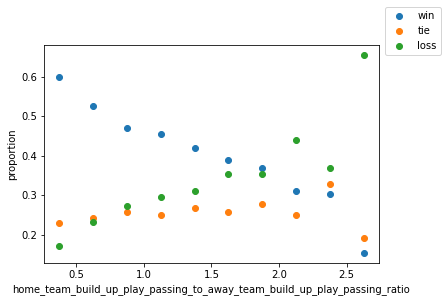

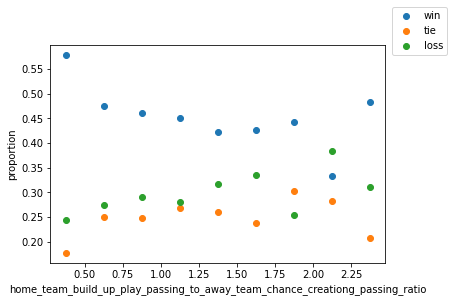

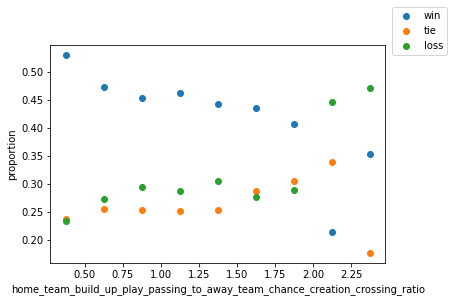

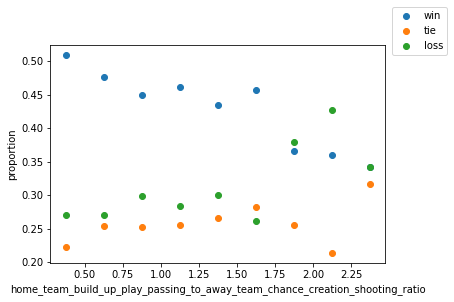

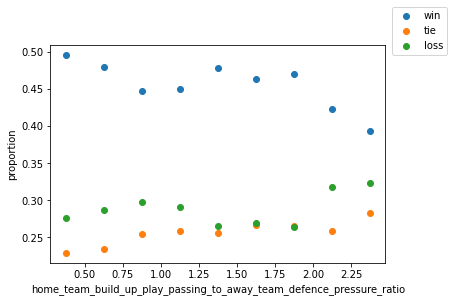

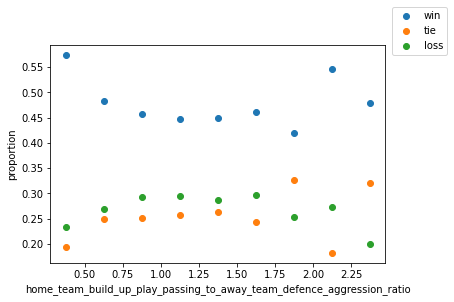

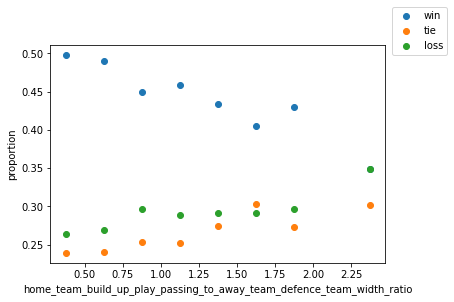

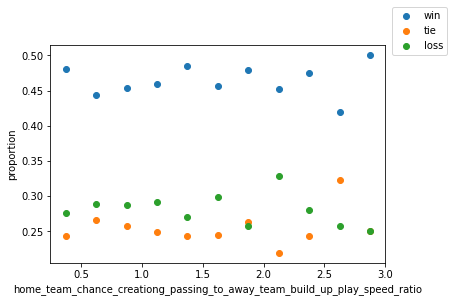

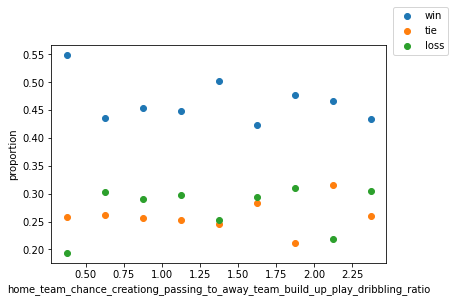

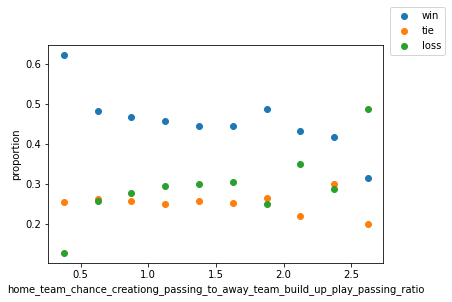

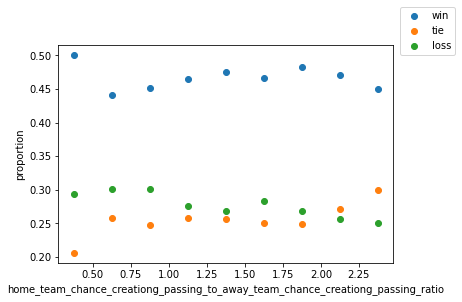

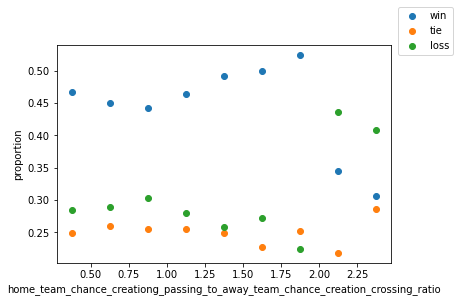

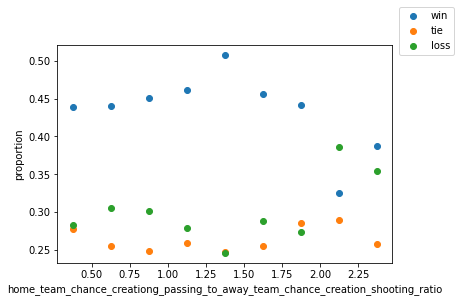

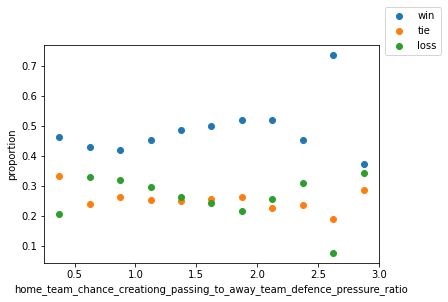

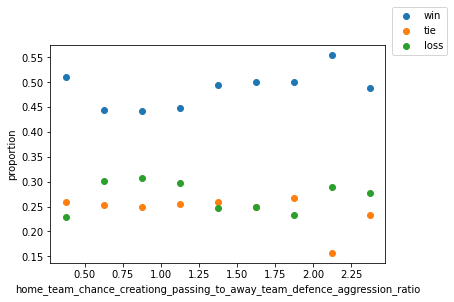

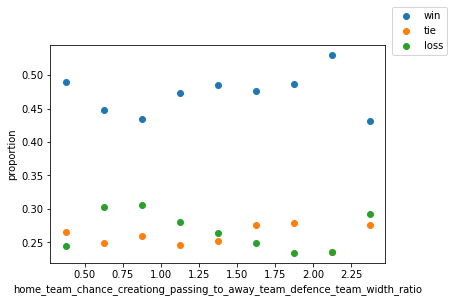

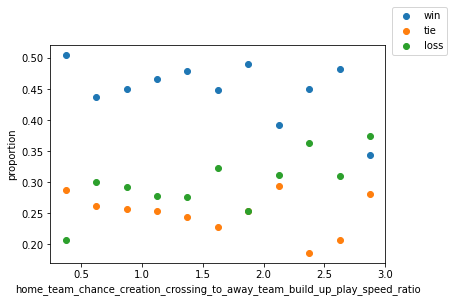

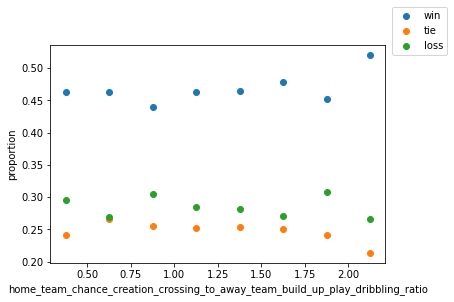

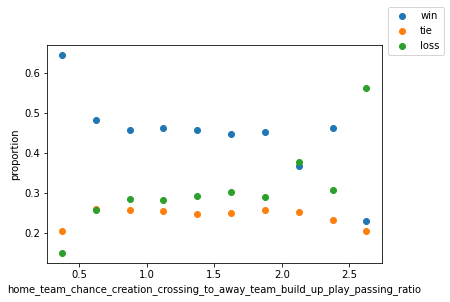

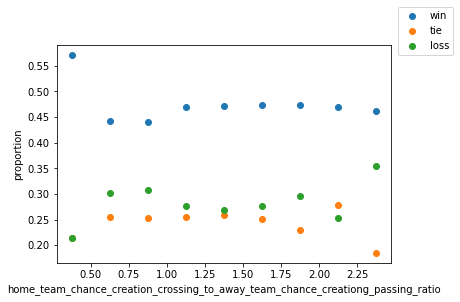

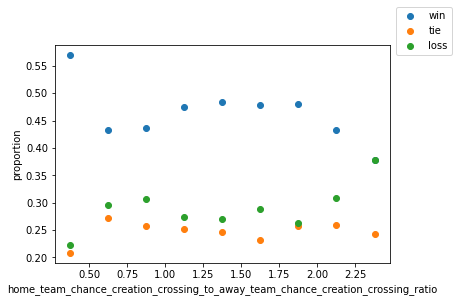

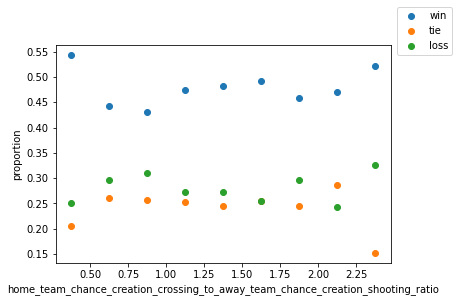

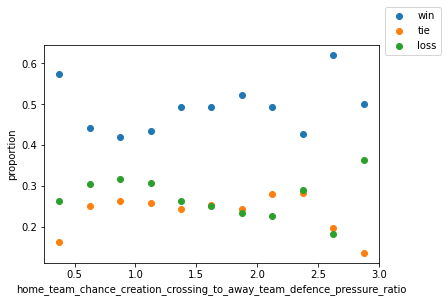

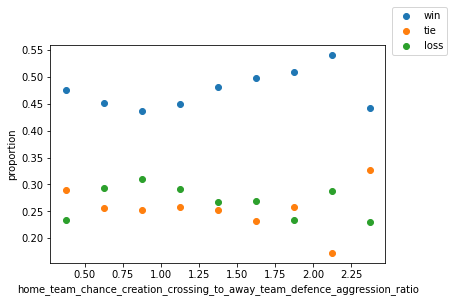

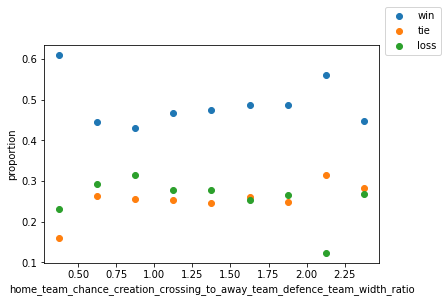

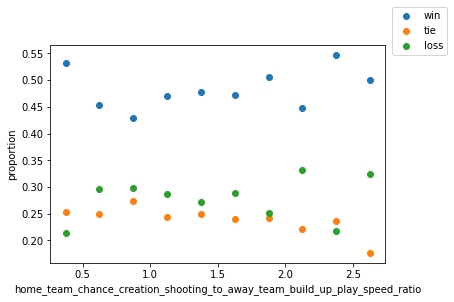

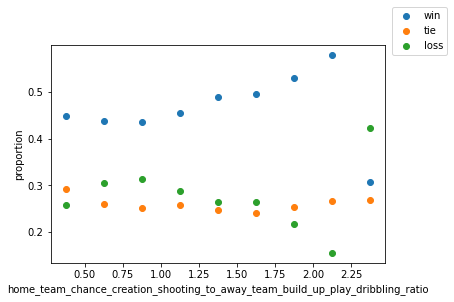

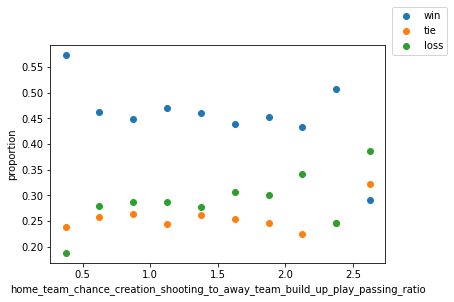

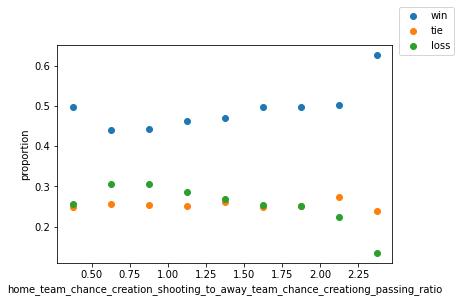

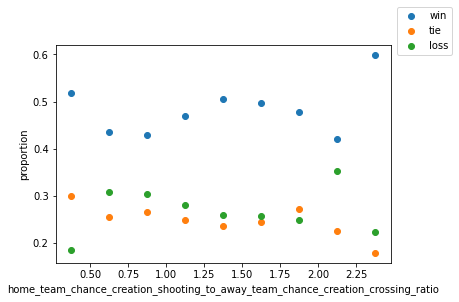

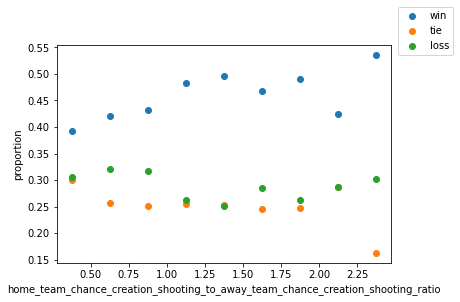

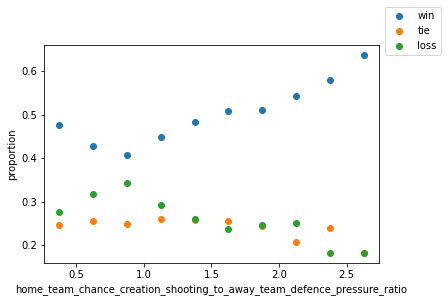

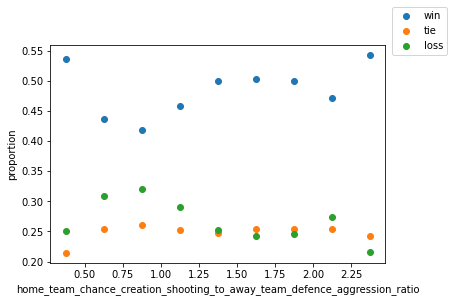

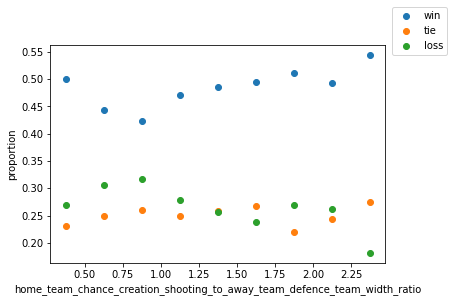

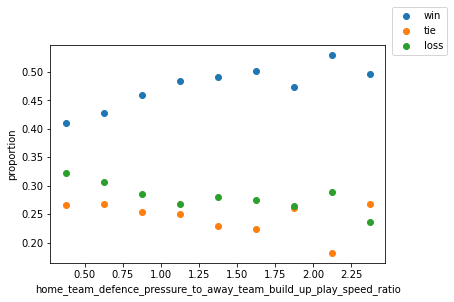

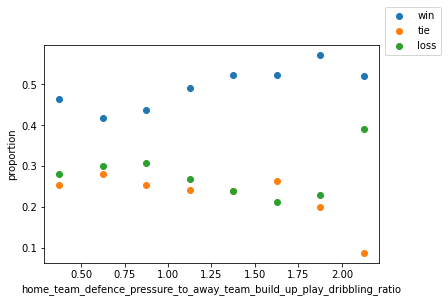

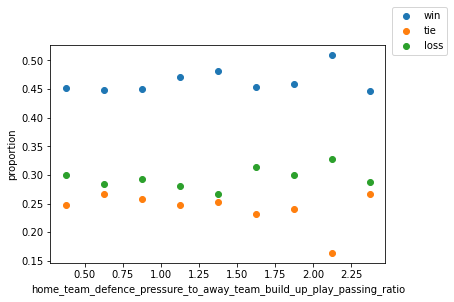

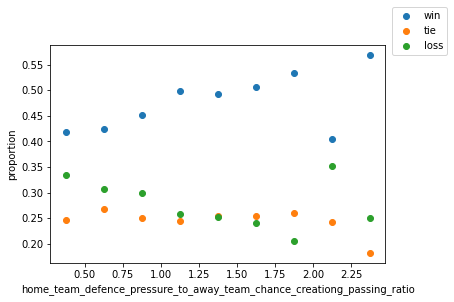

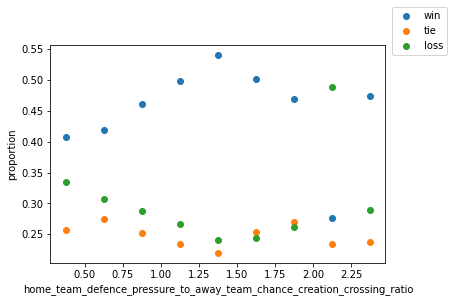

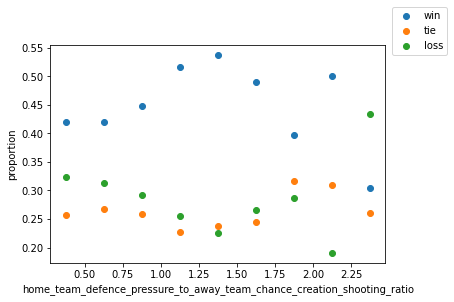

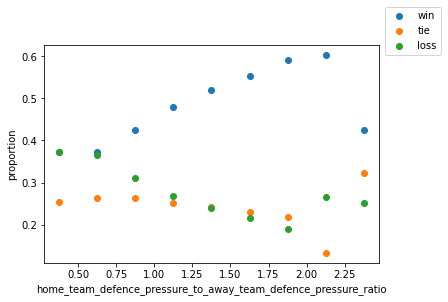

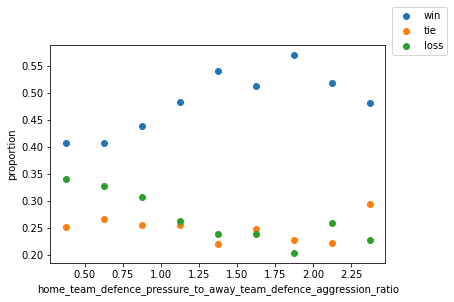

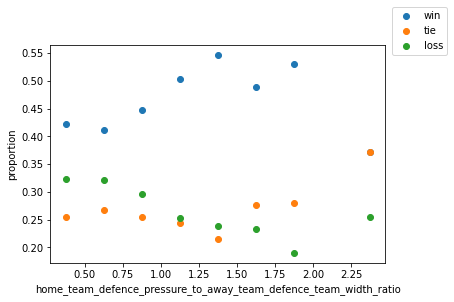

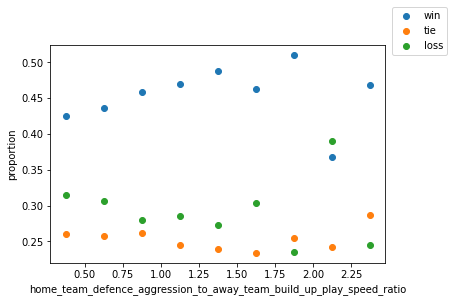

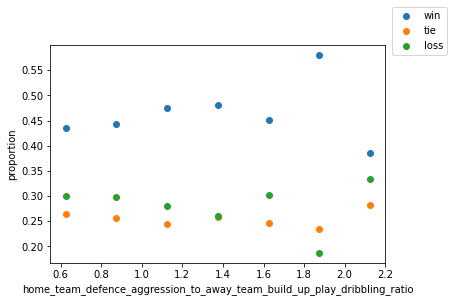

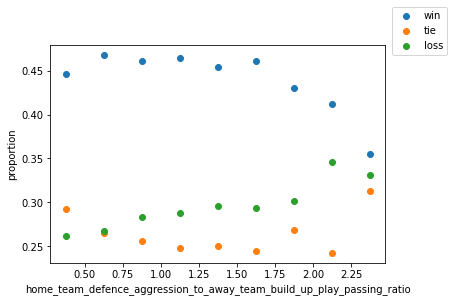

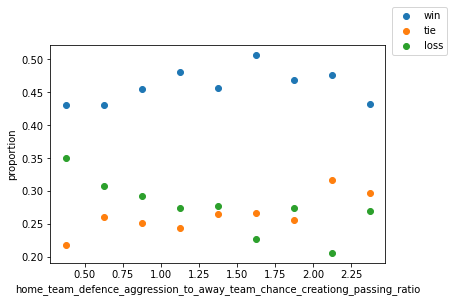

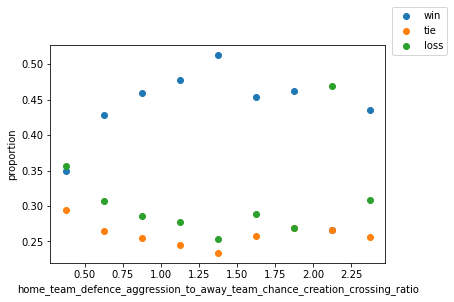

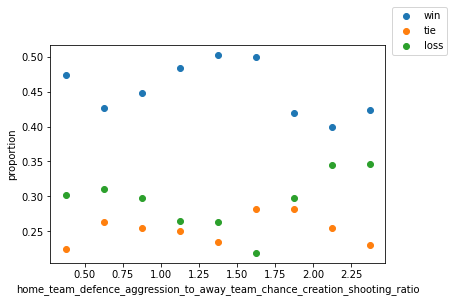

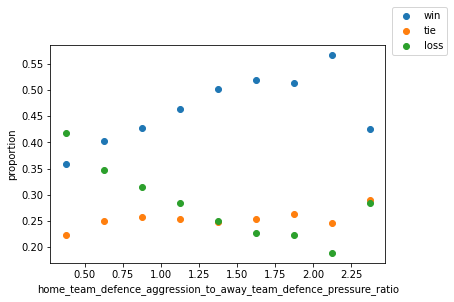

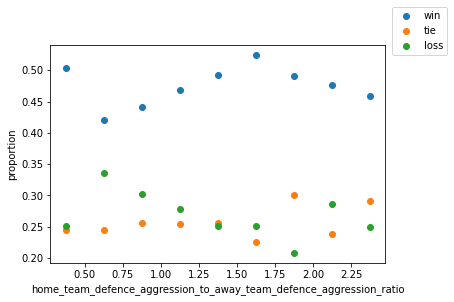

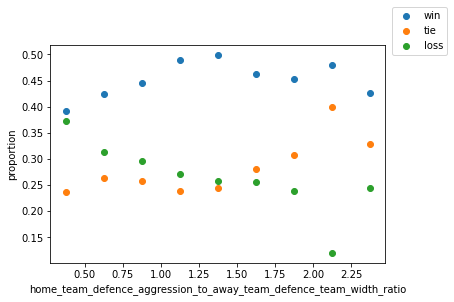

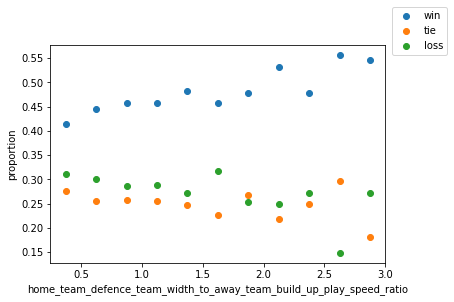

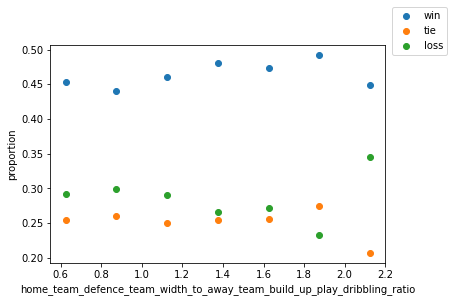

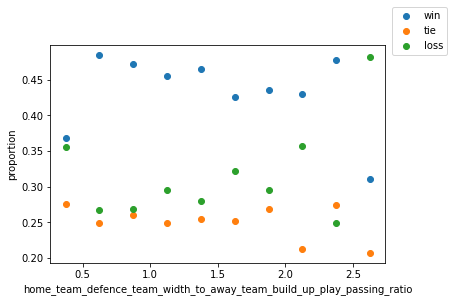

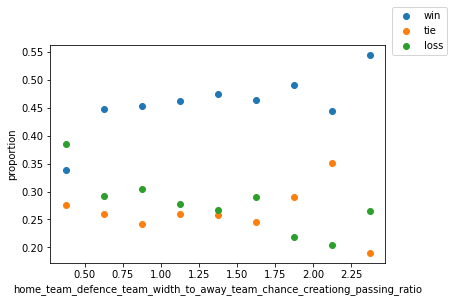

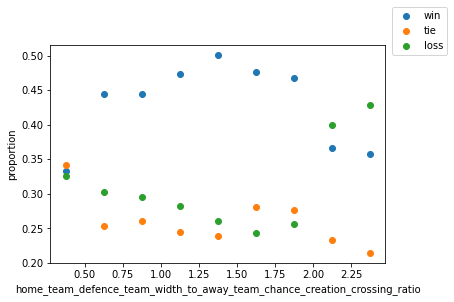

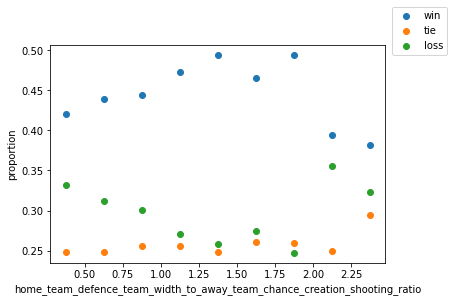

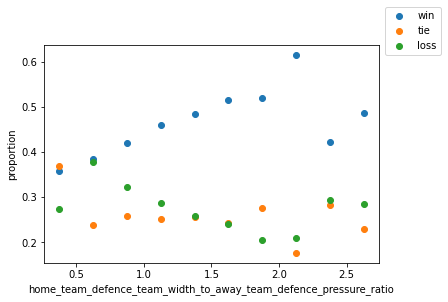

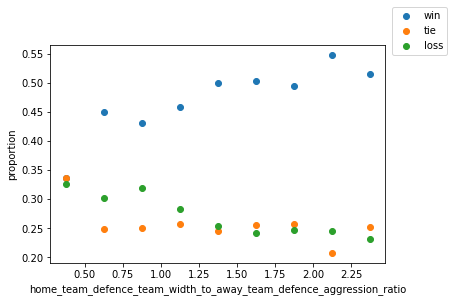

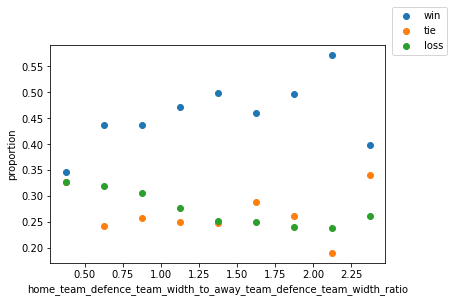

In [56]:
for ratio in ratio_features_of_interest:
    print(ratio)
    x_axis = []
    wins = []
    ties = []
    losses = []
    win = complete_matchDf['home_team_goal_to_away_team_goal_ratio'] > 1
    tie = complete_matchDf['home_team_goal_to_away_team_goal_ratio'] == 1
    loss = complete_matchDf['home_team_goal_to_away_team_goal_ratio'] < 1 
    for val in range(50):
        val_ratio = (val* 0.25 <= complete_matchDf[ratio]) & (complete_matchDf[ratio] < (val + 1)*0.25)
        val_win = len(complete_matchDf[val_ratio & win])
        val_tie = len(complete_matchDf[val_ratio & tie])
        val_loss = len(complete_matchDf[val_ratio & loss])
        total = val_win + val_tie + val_loss
        if total < 20:
            continue
        x_axis.append((2*val + 1)*0.125)
        wins.append(val_win/total)
        ties.append(val_tie/total)
        losses.append(val_loss/total)         
    plt.figure()
    plt.xlabel(ratio)
    plt.ylabel('proportion')
    plt.scatter(x_axis, wins, label = 'win')
    plt.scatter(x_axis, ties, label = 'tie')
    plt.scatter(x_axis, losses, label = 'loss')
    plt.legend(bbox_to_anchor = (1.2, 1.2), loc = "upper right")
        
            
            

C:\Users\hhong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


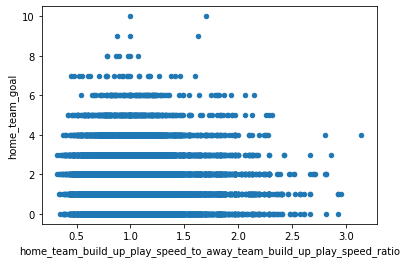

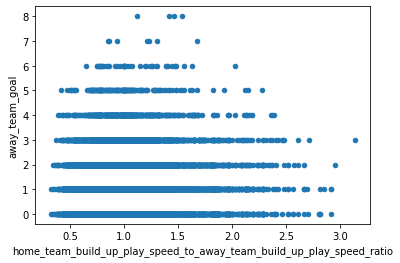

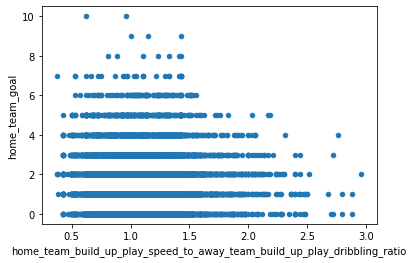

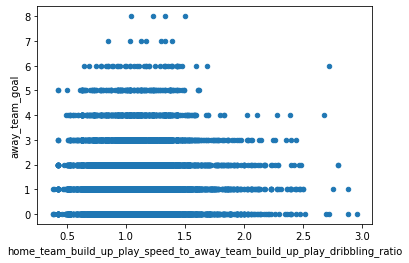

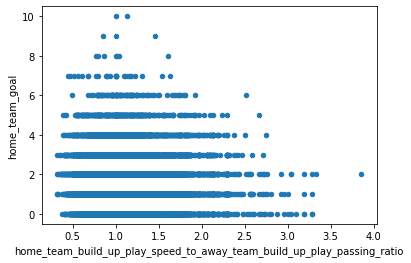

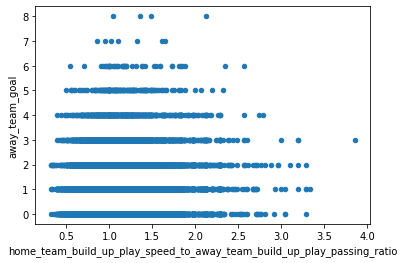

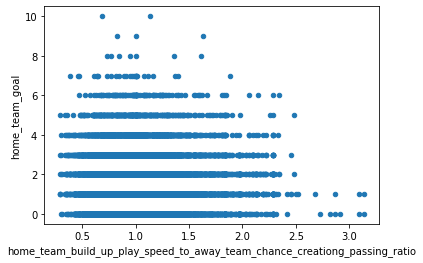

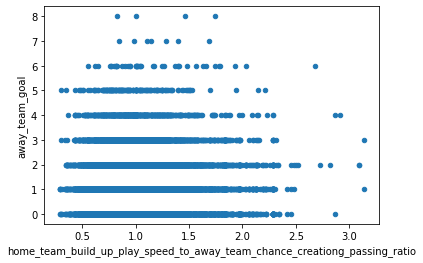

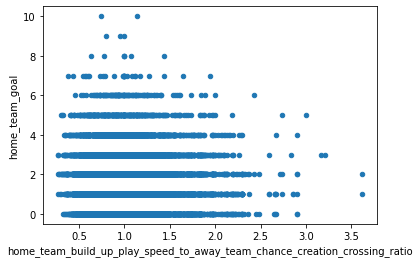

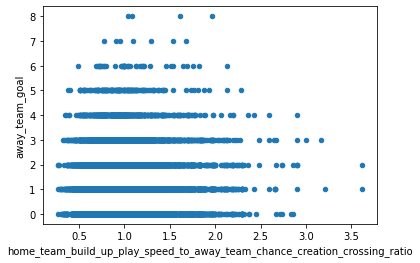

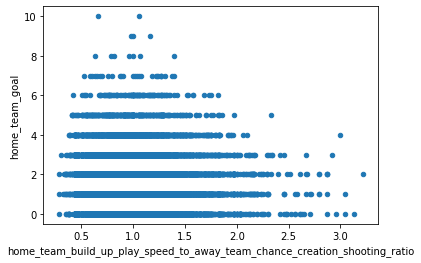

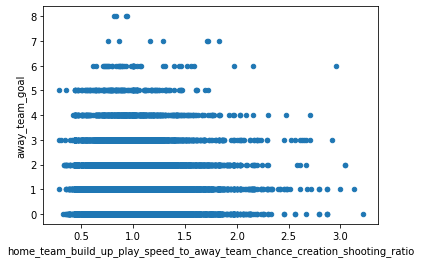

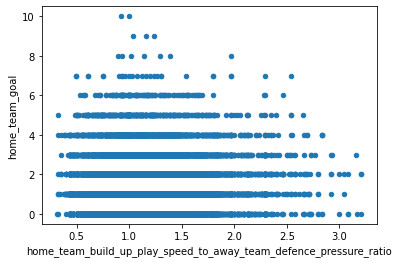

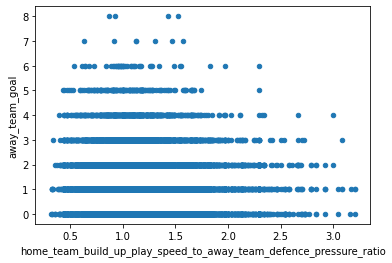

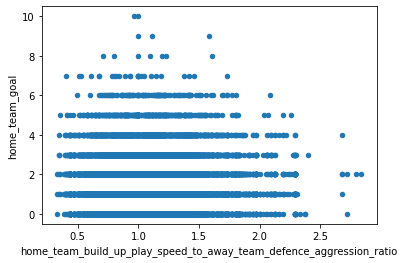

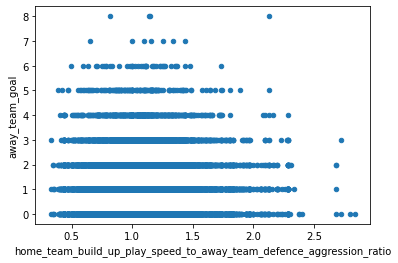

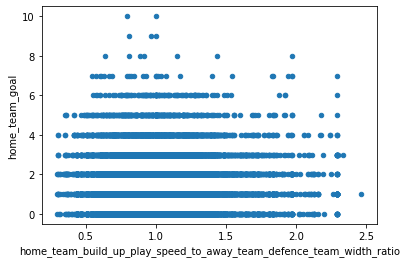

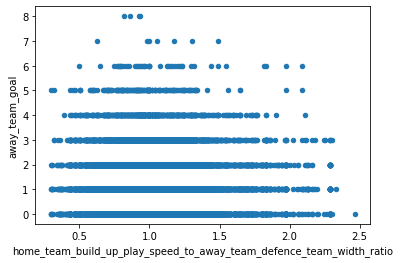

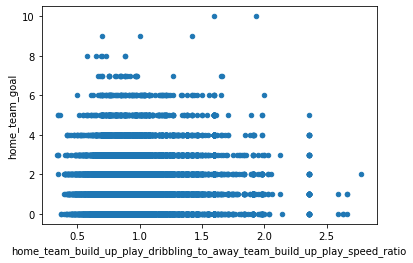

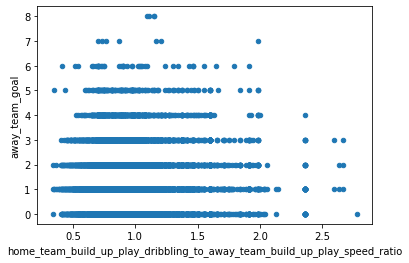

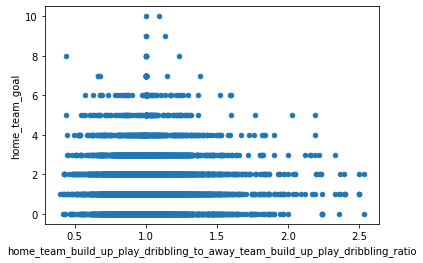

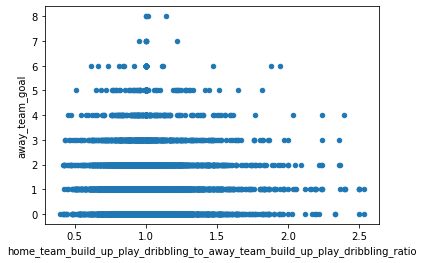

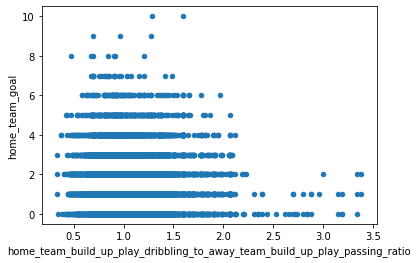

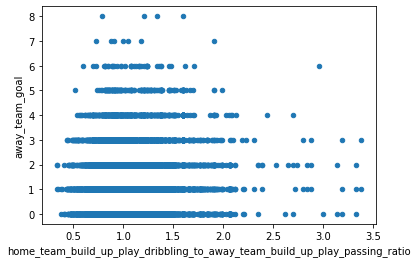

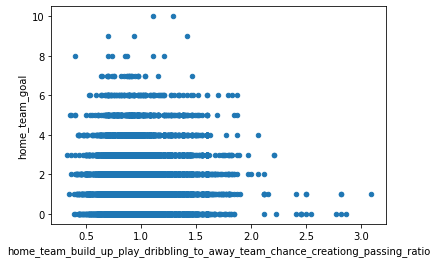

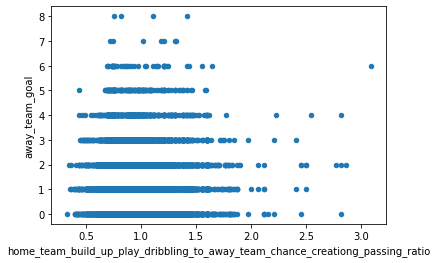

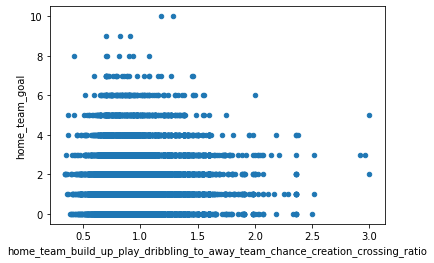

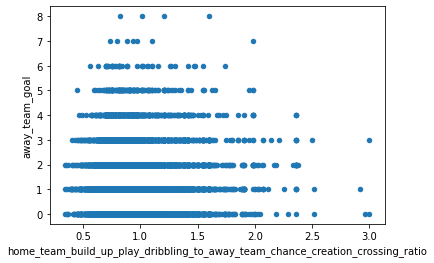

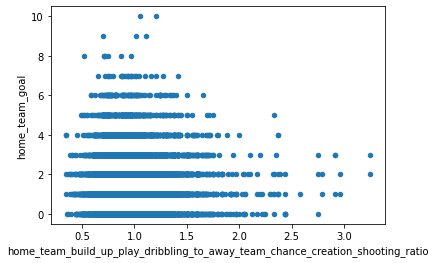

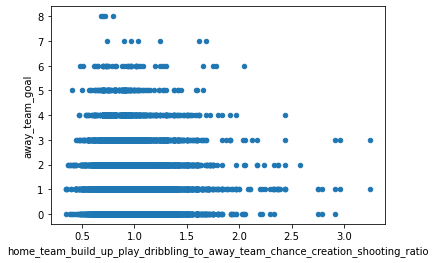

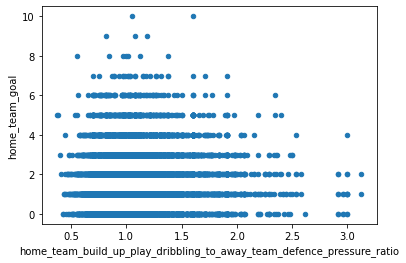

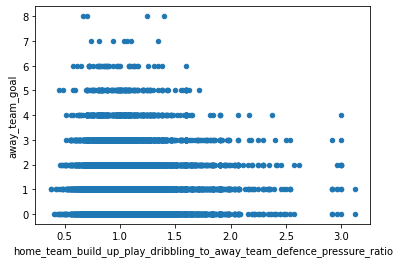

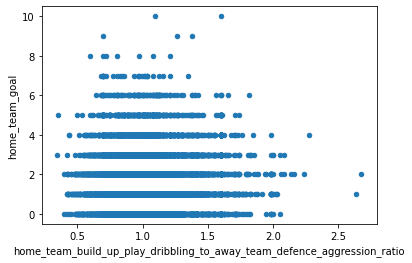

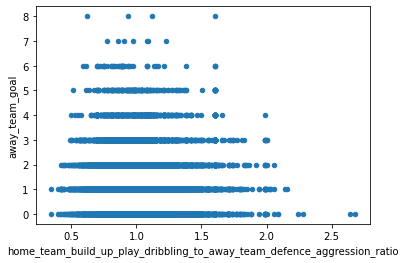

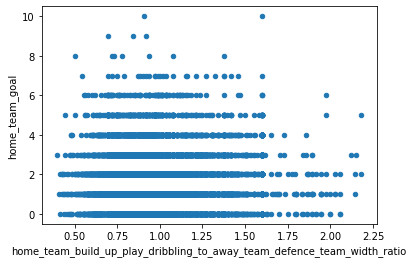

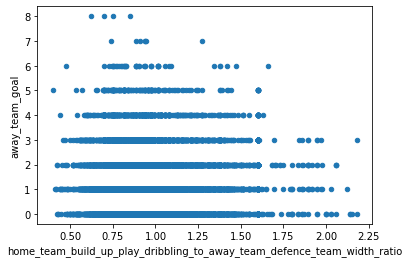

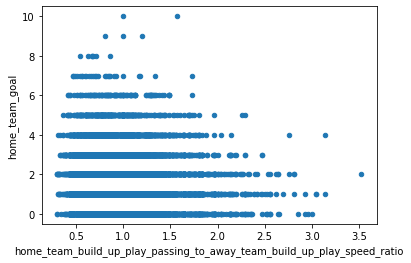

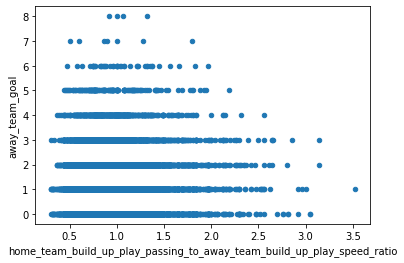

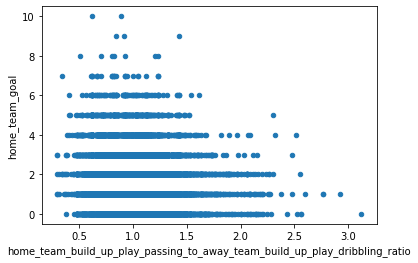

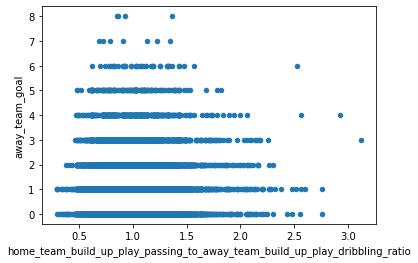

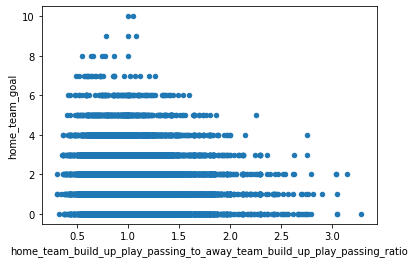

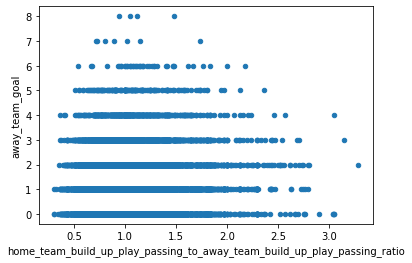

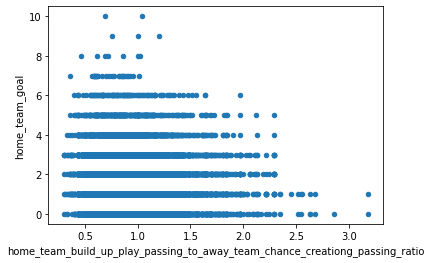

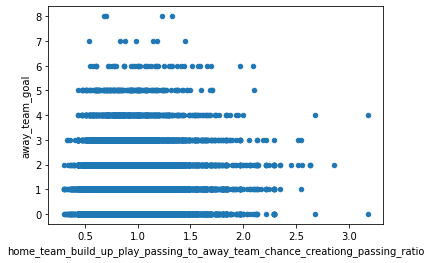

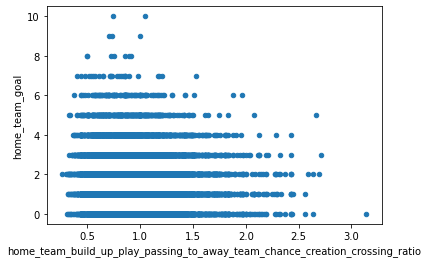

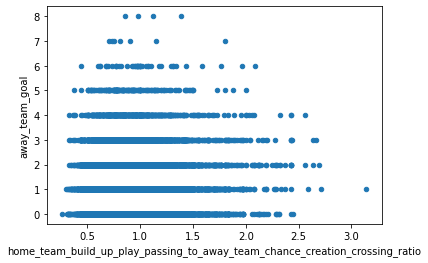

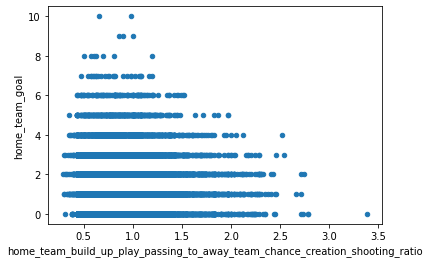

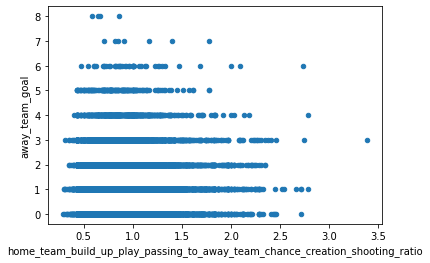

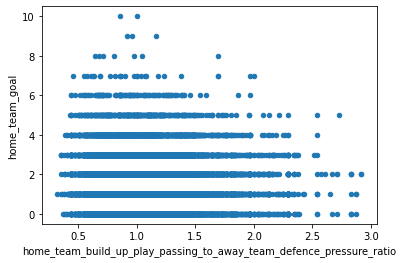

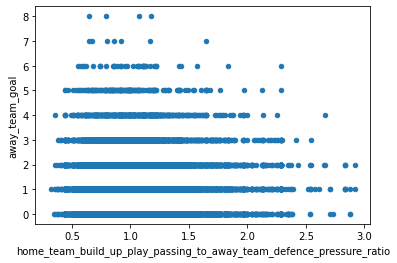

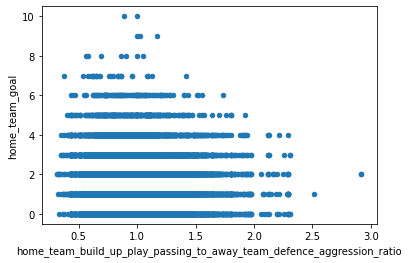

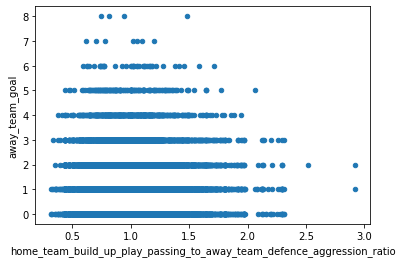

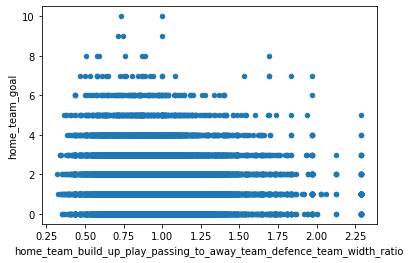

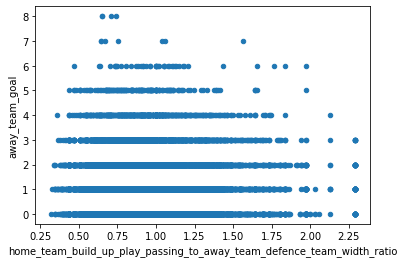

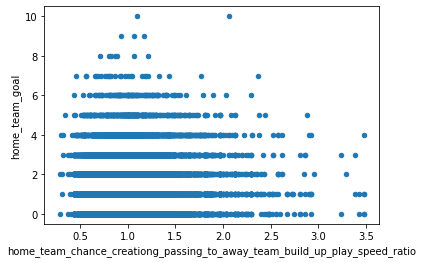

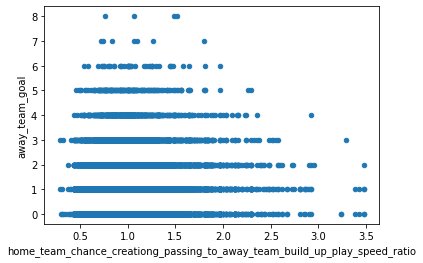

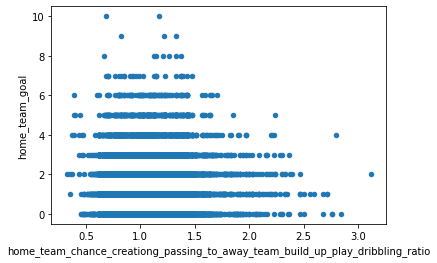

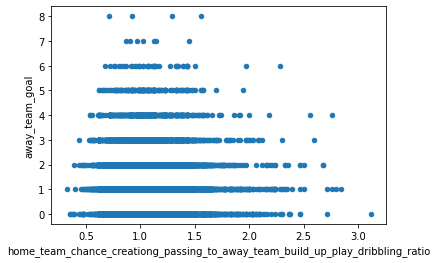

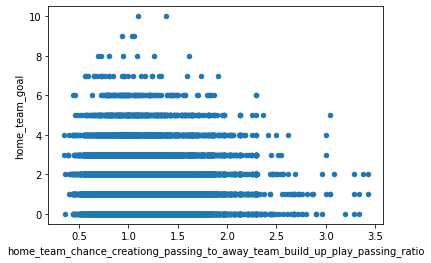

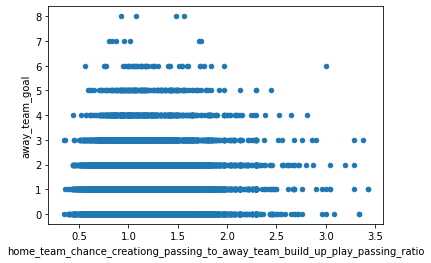

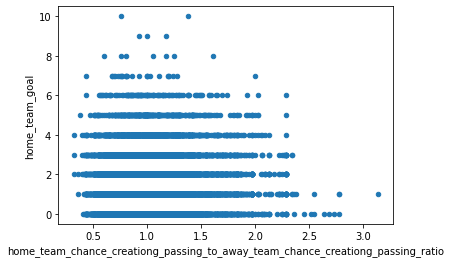

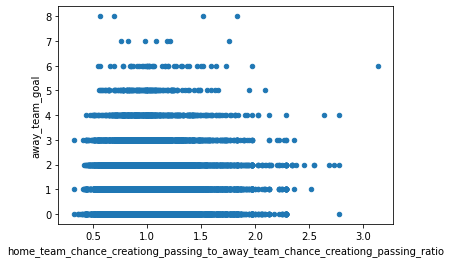

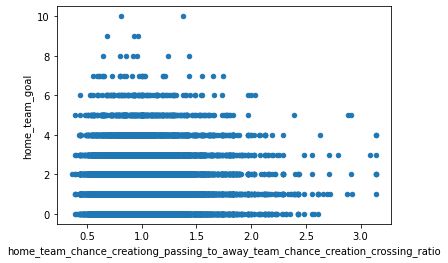

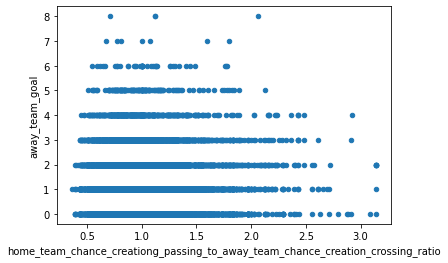

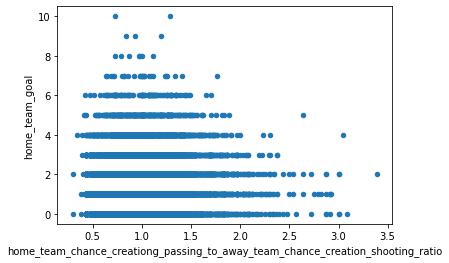

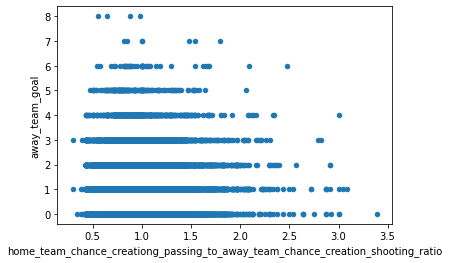

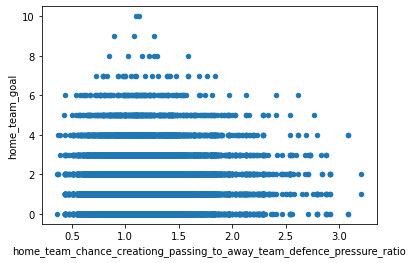

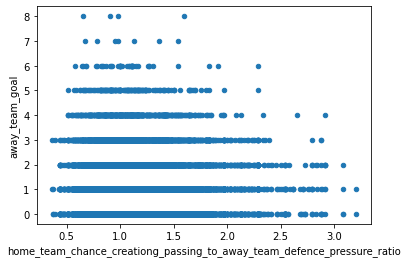

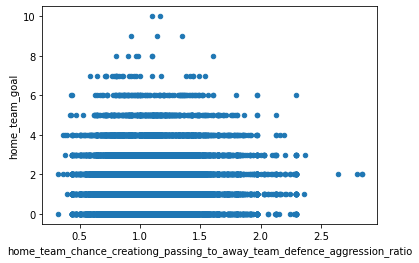

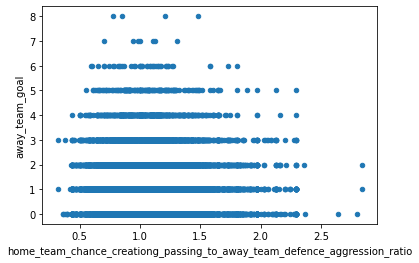

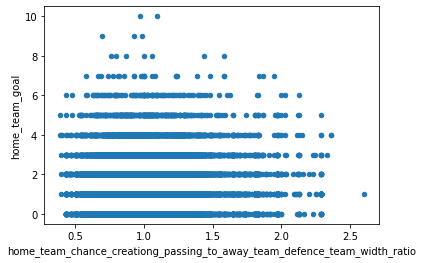

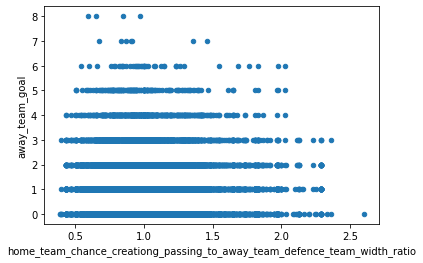

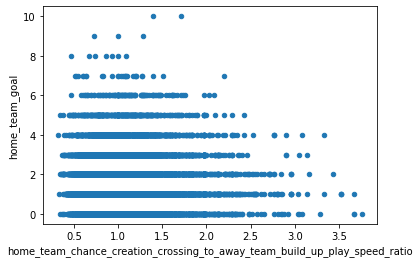

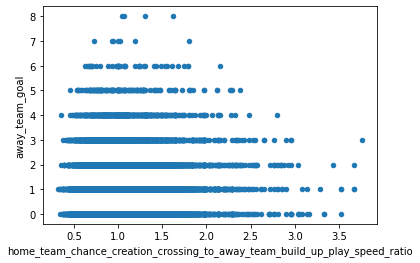

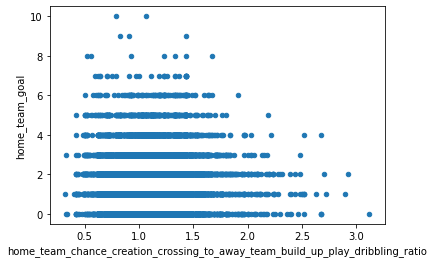

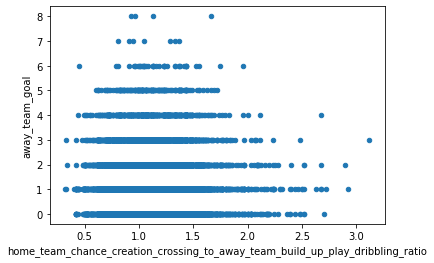

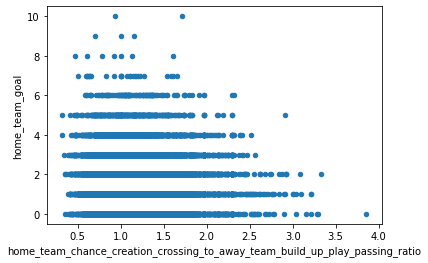

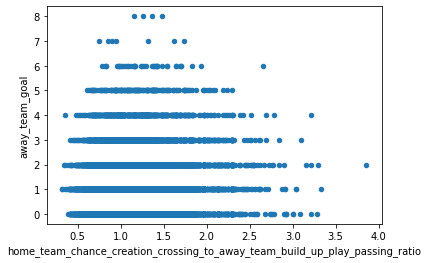

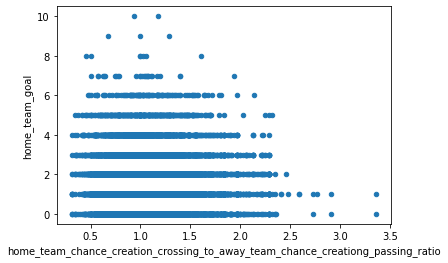

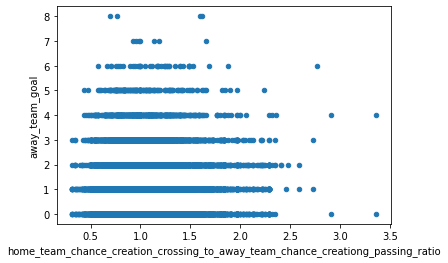

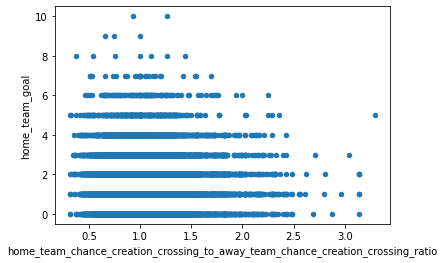

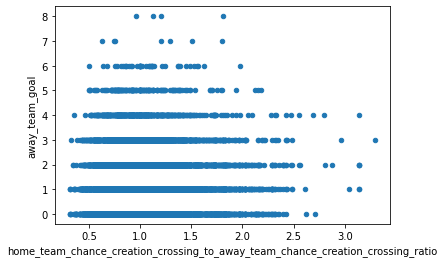

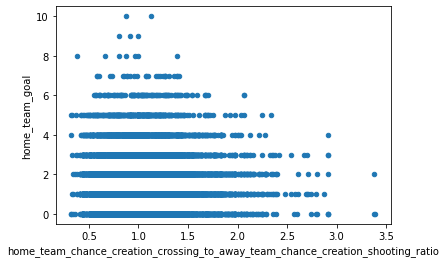

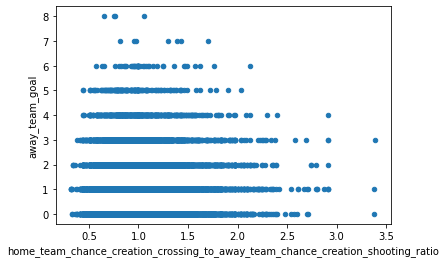

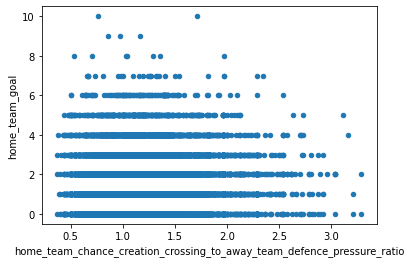

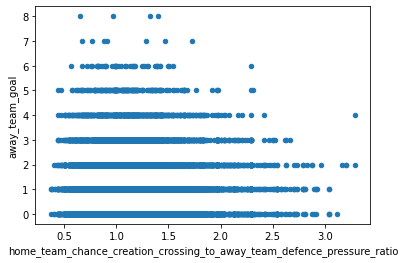

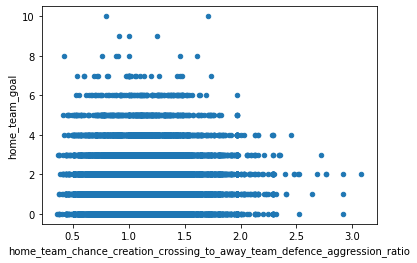

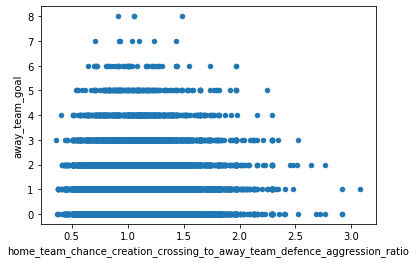

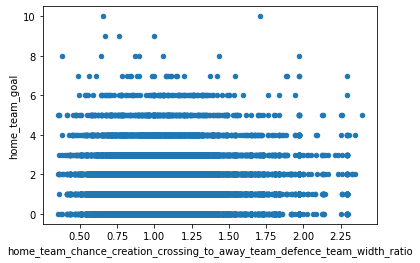

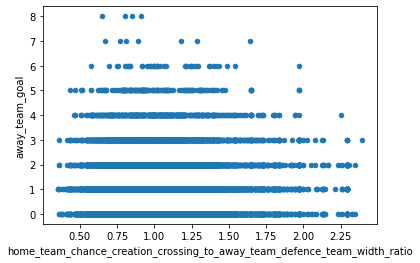

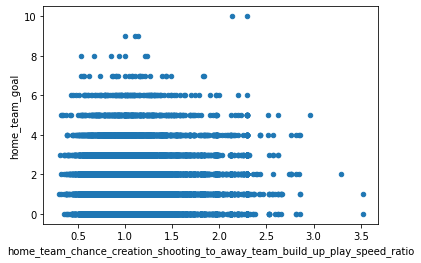

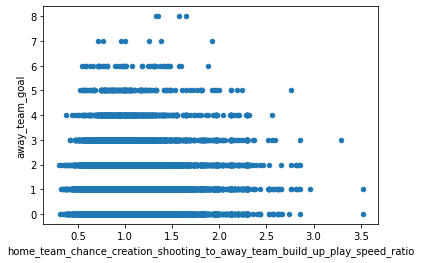

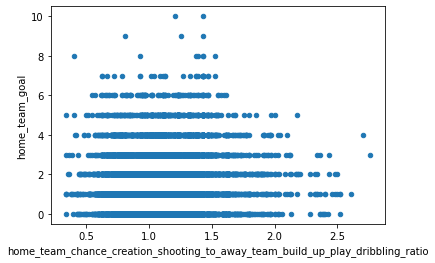

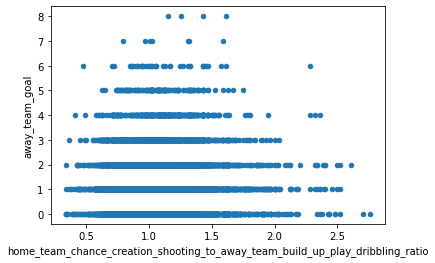

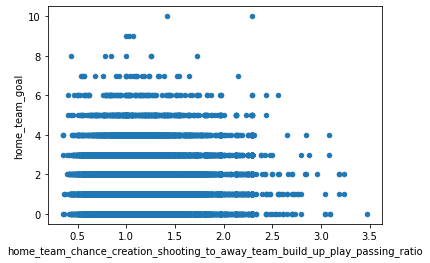

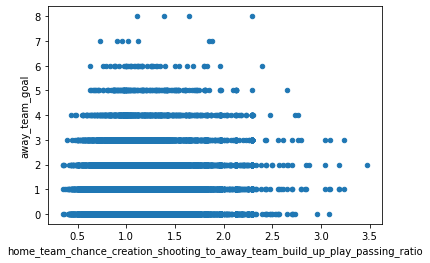

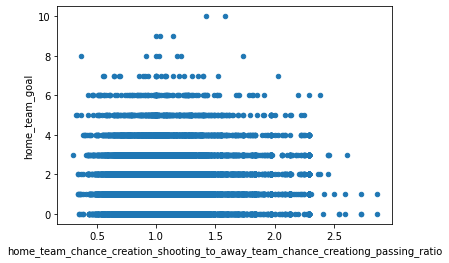

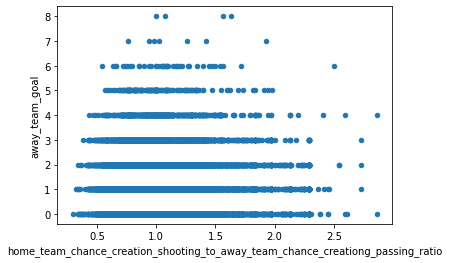

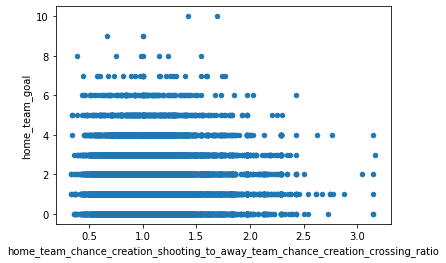

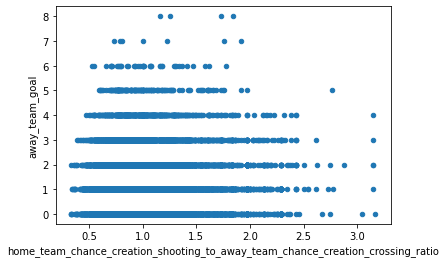

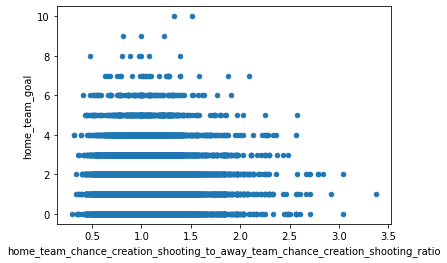

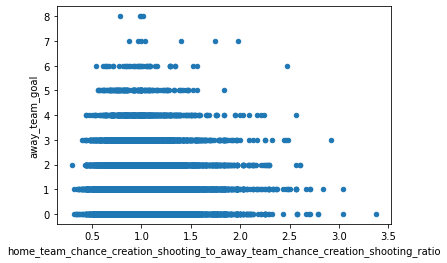

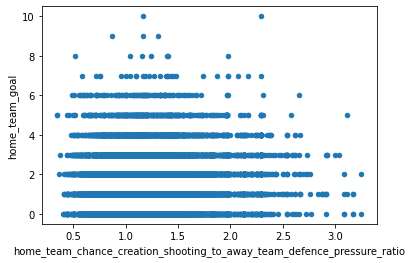

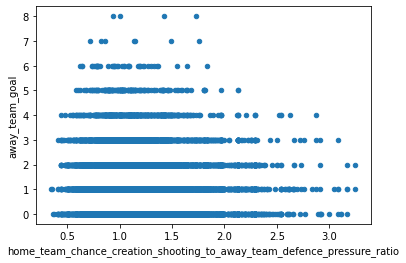

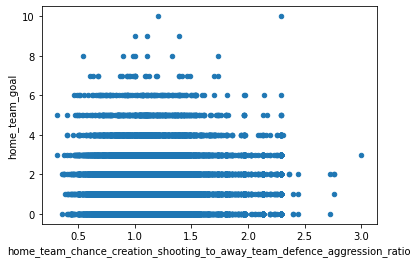

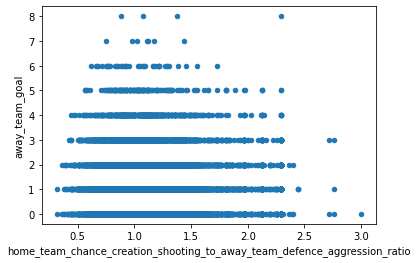

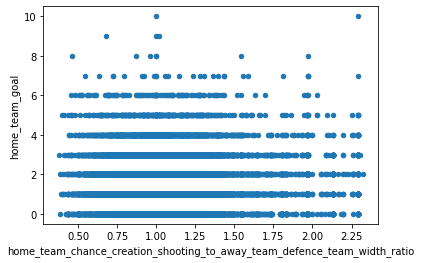

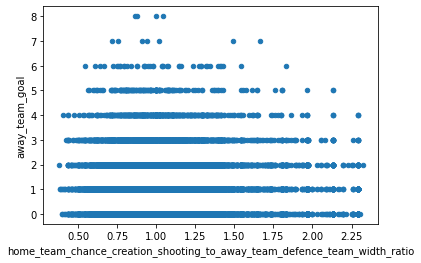

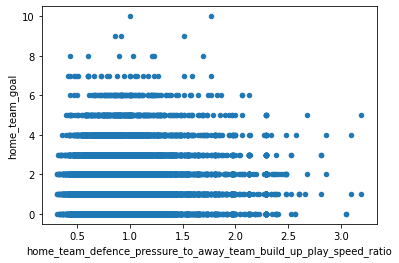

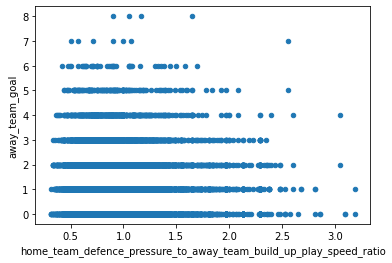

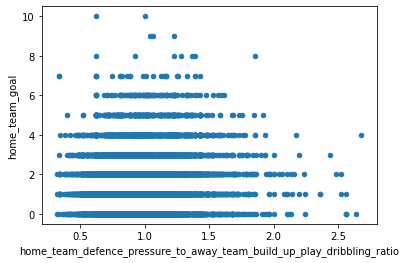

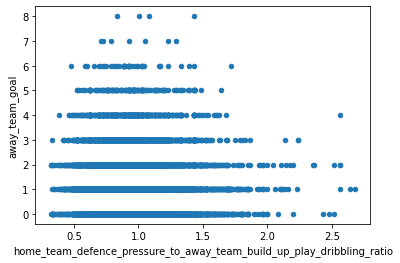

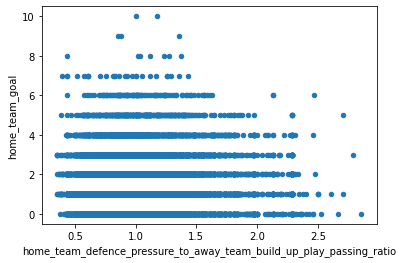

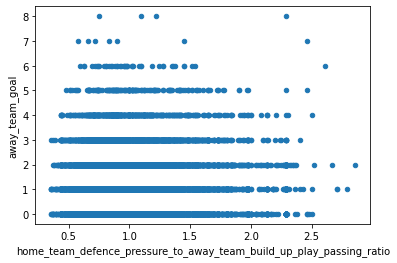

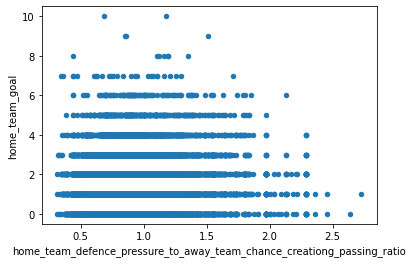

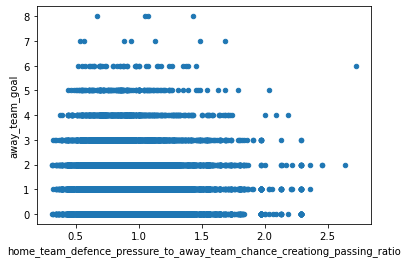

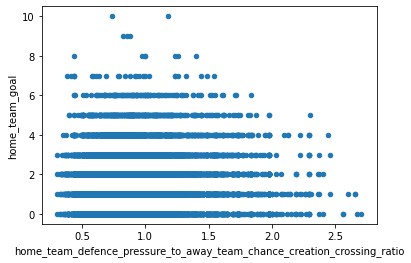

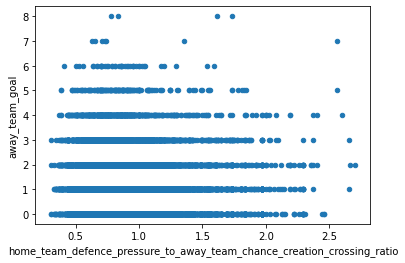

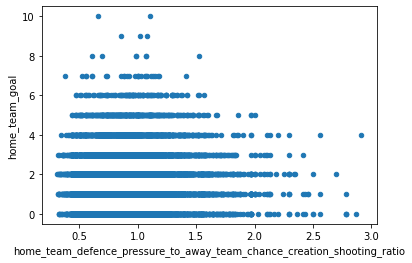

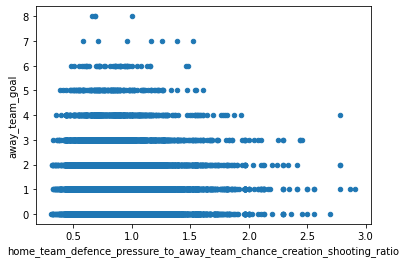

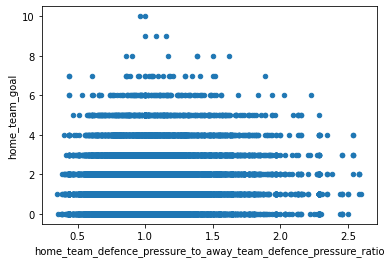

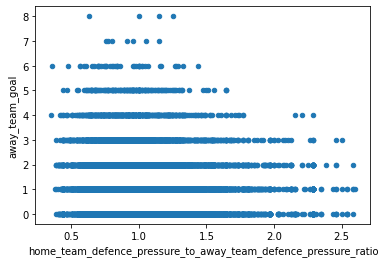

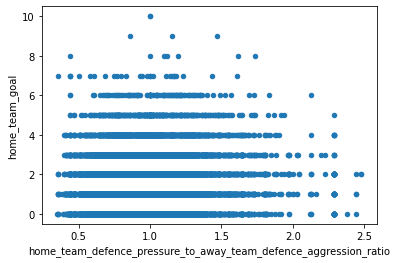

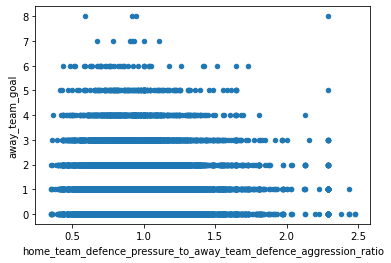

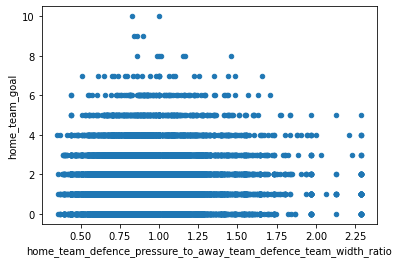

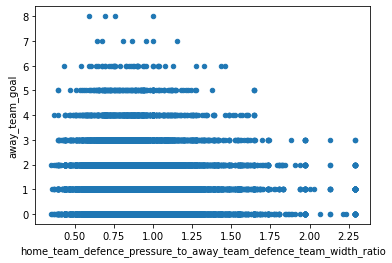

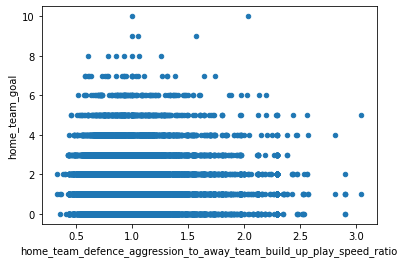

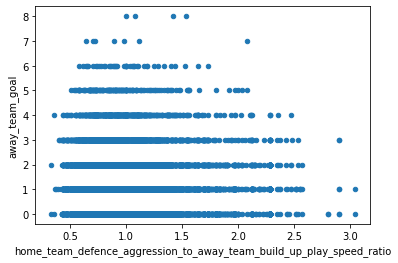

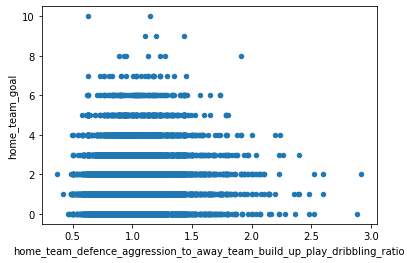

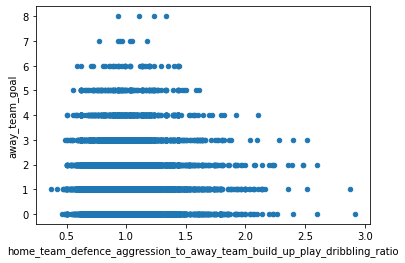

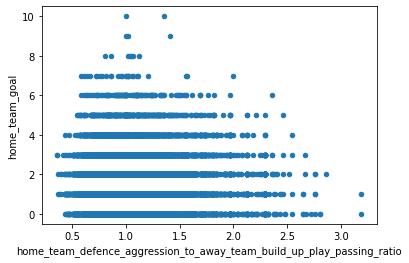

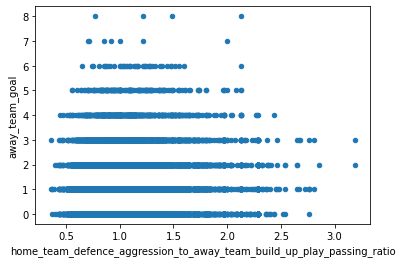

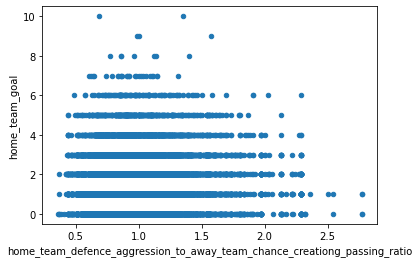

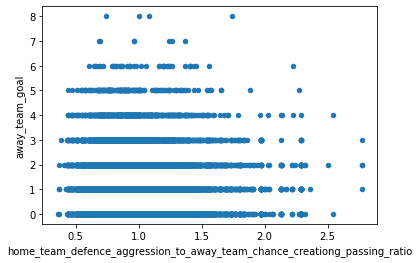

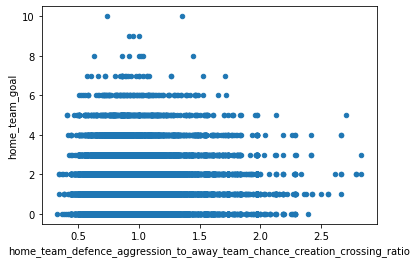

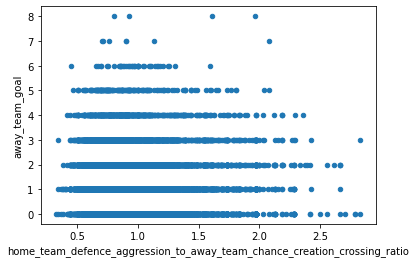

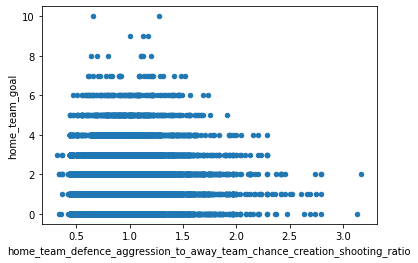

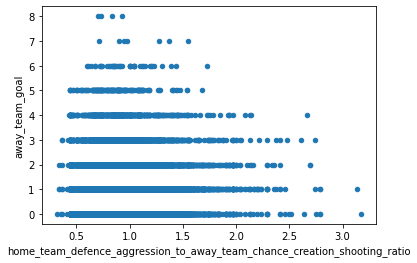

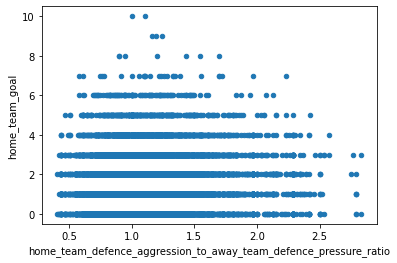

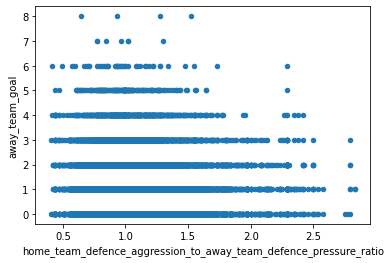

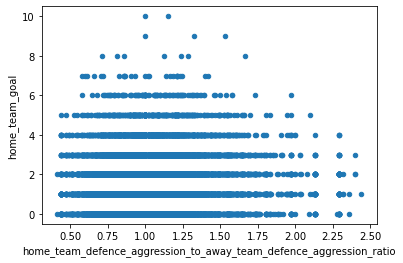

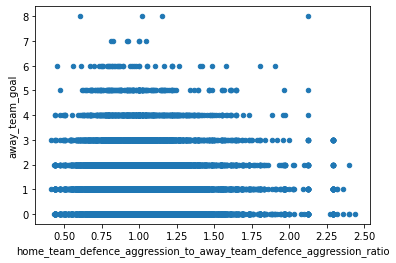

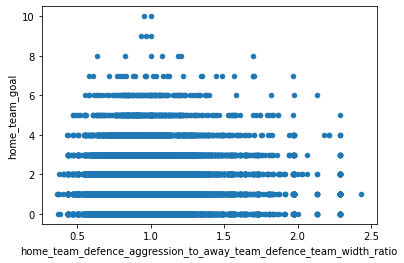

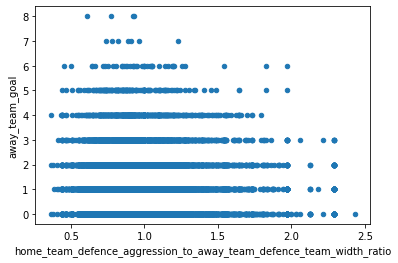

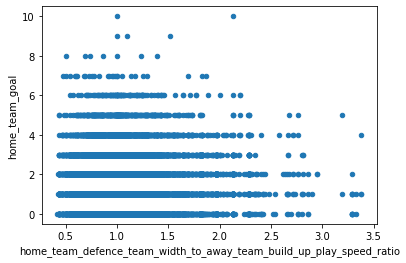

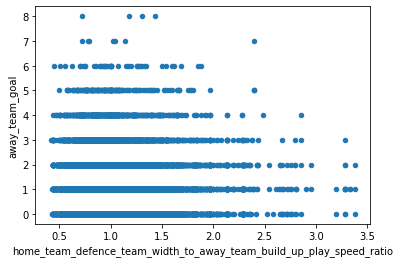

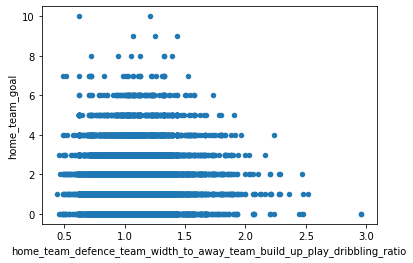

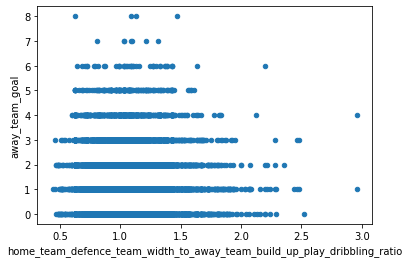

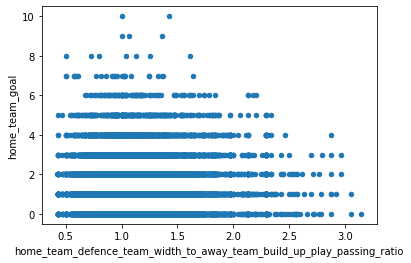

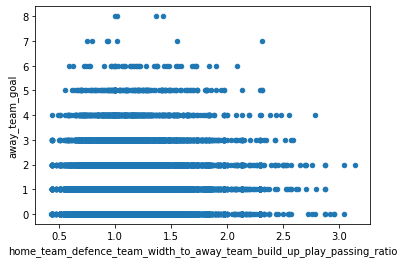

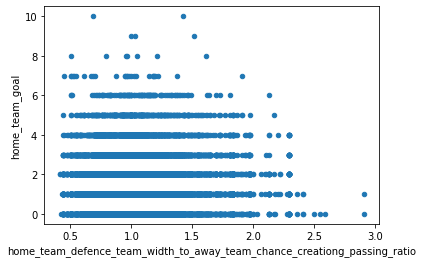

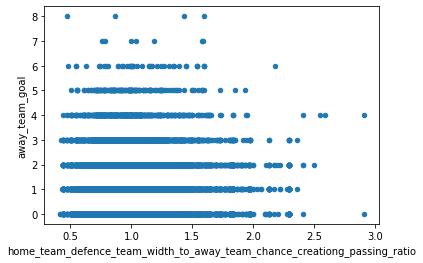

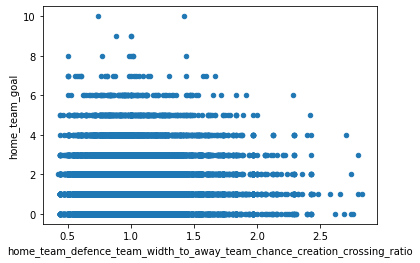

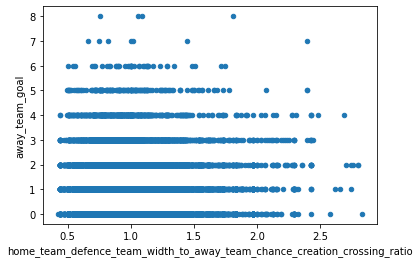

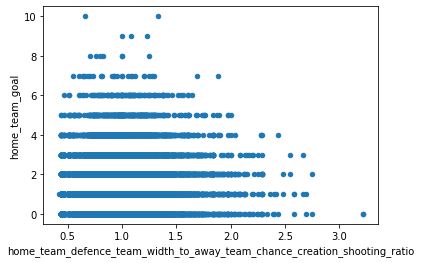

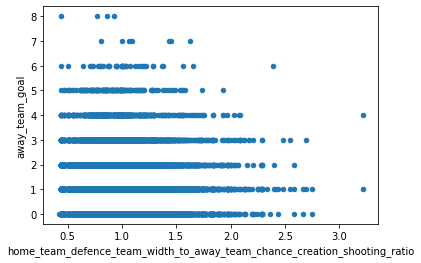

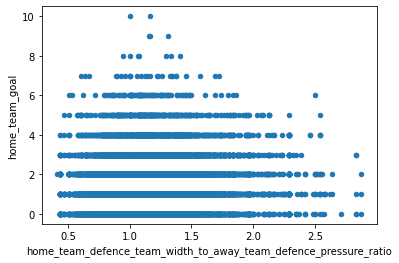

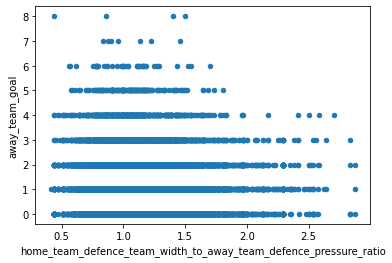

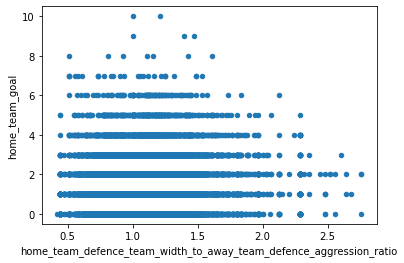

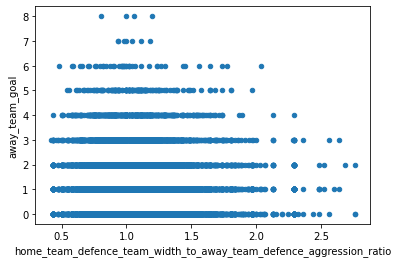

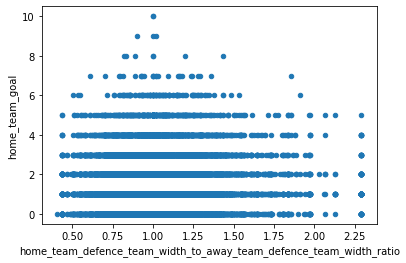

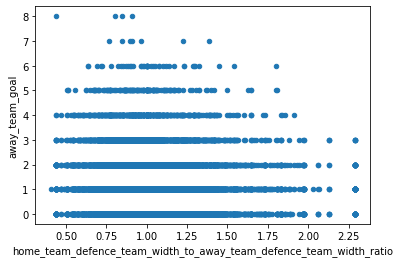

In [57]:
for ratio in ratio_features_of_interest:
    complete_matchDf.plot.scatter(x=ratio,
                      y='home_team_goal')
    complete_matchDf.plot.scatter(x = ratio, y = 'away_team_goal')
        